# Exploring the Rosetta Stone of Human Capital

This assignment is based on the working paper [A Rosetta Stone of Human Capital](https://www.cgdev.org/publication/rosetta-stone-human-capital), by Dev Patel and Justin Sandefur and all the analytics are run corresponding to the analytics of the paper. For better understanding, you can also read the related article at [The Economist](https://www.economist.com/graphic-detail/2020/10/03/its-better-to-be-a-poor-pupil-in-a-rich-country-than-the-reverse).

As you may know, there are different tests that measure reading and writing skills at school among countries in the world. The problem is that not all countries use the same tests. The basic contribution of the authors was to come up with a way to facilitate conversion between test scores in different countries. In this way they have created what they call a "Rosetta Stone of Human Capital", because it allows us to compare human capital across the different countries.

---

> Aliki Ntouzgou, 8170091 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> aliki.ntouzgou@gmail.com


<b><i>Please note that all the files used for the analysis below are saved in the same catalog, named Rosetta Data.</i></b>

Importing all the necessary libraries we are going to need.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline

---

## Income and Test Results

First, we are going to study the relationship between income and the TIMSS and PIRLS score and then we will investigate the relationship between logged income and TIMMS, and logged income and PIRLS.
    
You can verify the results in Section 4.1 and Figure 5 of the original paper.

We read the dataset with the TIMSS and PIRLS scores.<br>
* The TIMSS score is assumed to measure the mathematical ability of a country.
* The PIRLS score is assumed to measure the reading ability of a country.

In [2]:
country_scores = pd.read_excel('https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx',
                               sheet_name='Country Scores')
country_scores.head()

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.00,63.98,437.00,440.00
1,Argentina,ARG,51.00,66.00,406.65,431.44
2,Armenia,ARM,71.51,nan,454.00,nan
3,Australia,AUS,90.00,92.93,520.00,534.00
4,Austria,AUT,95.30,97.10,511.00,533.00


Then, we read the dataset that contains the income data per country as given by the World Bank...

In [3]:
wdi_data = pd.read_csv('Rosetta Data\WDI_data.csv')
wdi_data.drop(wdi_data.tail(5).index, inplace = True) 
wdi_data.head()

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266


In [4]:
wdi_data['Series Name'].unique()

array(['GDP per capita, PPP (constant 2011 international $)',
       'School enrollment, primary (% net)',
       'School enrollment, primary (% gross)'], dtype=object)

... and we create the GDP per capita (PPP) dataset:

In [5]:
gdp_per_capita = wdi_data.loc[wdi_data['Series Name'].isin(['GDP per capita, PPP (constant 2011 international $)'])].copy()
print(gdp_per_capita.shape)
gdp_per_capita.head()

(264, 5)


,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..


In [6]:
gdp_per_capita.rename(columns={"2015 [YR2015]": "GDP Per Capita"}, inplace=True)
print(gdp_per_capita.shape)
gdp_per_capita.head()

(264, 5)


,Country Name,Country Code,Series Name,Series Code,GDP Per Capita
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..


In [7]:
gdp_per_capita.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
GDP Per Capita    object
dtype: object

In [8]:
gdp_per_capita = gdp_per_capita.loc[gdp_per_capita['GDP Per Capita'] != '..']
print(gdp_per_capita.shape)
gdp_per_capita.head()

(234, 5)


,Country Name,Country Code,Series Name,Series Code,GDP Per Capita
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
15,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6231.06799206401
18,Antigua and Barbuda,ATG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,20154.9474879241


In [9]:
gdp_per_capita = gdp_per_capita.astype({"GDP Per Capita": float})

In [10]:
gdp_per_capita.dtypes

Country Name       object
Country Code       object
Series Name        object
Series Code        object
GDP Per Capita    float64
dtype: object

Now, we are ready to merge the Country Scores dataset with the GDP per capita dataset in order to connect each TIMSS and PIRLS score with its corresponding country:

In [11]:
TIMSS_GDP = pd.merge(gdp_per_capita, country_scores, on='Country Code', how='inner')
print(TIMSS_GDP.shape)
TIMSS_GDP.head()

(78, 10)


,Country Name,Country Code,Series Name,Series Code,GDP Per Capita,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"19,101.30",Argentina,51.00,66.00,406.65,431.44
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"8,195.93",Armenia,71.51,nan,454.00,nan
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"43,719.50",Australia,90.00,92.93,520.00,534.00
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"44,353.88",Austria,95.30,97.10,511.00,533.00
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"16,698.86",Azerbaijan,72.28,81.86,465.00,467.00


In [12]:
TIMSS_GDP = TIMSS_GDP[['Country Name', 'Country Code', 'Series Name', 'GDP Per Capita', 'Median Math Score (TIMSS Scale, 4th Grade)']]
TIMSS_GDP.rename(columns={"Median Math Score (TIMSS Scale, 4th Grade)": "TIMSS"}, inplace=True)
TIMSS_GDP.head()

,Country Name,Country Code,Series Name,GDP Per Capita,TIMSS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...","19,101.30",406.65
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...","8,195.93",454.00
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...","43,719.50",520.00
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...","44,353.88",511.00
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...","16,698.86",465.00


In [13]:
TIMSS_GDP.rename(columns={"GDP Per Capita": "Log GDP per Capita (PPP) in 2015"}, inplace=True)
TIMSS_GDP['Log GDP per Capita (PPP) in 2015'] = np.log(TIMSS_GDP['Log GDP per Capita (PPP) in 2015'])
TIMSS_GDP.head()

,Country Name,Country Code,Series Name,Log GDP per Capita (PPP) in 2015,TIMSS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.86,406.65
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.01,454.00
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.69,520.00
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.70,511.00
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",9.72,465.00


Since we will use these datasets later for the regression we better check if there are any NaN values...

In [14]:
TIMSS_GDP.isna().sum()

Country Name                        0
Country Code                        0
Series Name                         0
Log GDP per Capita (PPP) in 2015    0
TIMSS                               7
dtype: int64

...and exclude them:

In [15]:
TIMSS_GDP.dropna(inplace=True)
TIMSS_GDP.reset_index(drop=True, inplace=True)
TIMSS_GDP.head()

,Country Name,Country Code,Series Name,Log GDP per Capita (PPP) in 2015,TIMSS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.86,406.65
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.01,454.00
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.69,520.00
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.70,511.00
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",9.72,465.00


And now we are clear:

In [16]:
TIMSS_GDP.isna().sum()

Country Name                        0
Country Code                        0
Series Name                         0
Log GDP per Capita (PPP) in 2015    0
TIMSS                               0
dtype: int64

We create the same dataset as above with the PIRLS scores:

In [17]:
PIRLS_GDP = pd.merge(gdp_per_capita, country_scores, on='Country Code', how='inner')
print(PIRLS_GDP.shape)
PIRLS_GDP.head()

(78, 10)


,Country Name,Country Code,Series Name,Series Code,GDP Per Capita,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"19,101.30",Argentina,51.00,66.00,406.65,431.44
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"8,195.93",Armenia,71.51,nan,454.00,nan
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"43,719.50",Australia,90.00,92.93,520.00,534.00
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"44,353.88",Austria,95.30,97.10,511.00,533.00
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"16,698.86",Azerbaijan,72.28,81.86,465.00,467.00


In [18]:
PIRLS_GDP = PIRLS_GDP[['Country Name', 'Country Code', 'Series Name', 'GDP Per Capita', 'Median Reading Score (PIRLS Scale, 4th Grade)']]
PIRLS_GDP.rename(columns={"Median Reading Score (PIRLS Scale, 4th Grade)": "PIRLS"}, inplace=True)
PIRLS_GDP.head()

,Country Name,Country Code,Series Name,GDP Per Capita,PIRLS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...","19,101.30",431.44
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...","8,195.93",nan
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...","43,719.50",534.00
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...","44,353.88",533.00
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...","16,698.86",467.00


In [19]:
PIRLS_GDP.rename(columns={"GDP Per Capita": "Log GDP per Capita (PPP) in 2015"}, inplace=True)
PIRLS_GDP['Log GDP per Capita (PPP) in 2015'] = np.log(PIRLS_GDP['Log GDP per Capita (PPP) in 2015'])
PIRLS_GDP.head()

,Country Name,Country Code,Series Name,Log GDP per Capita (PPP) in 2015,PIRLS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.86,431.44
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.01,nan
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.69,534.00
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.70,533.00
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",9.72,467.00


And we act the same regarding the NaN values:

In [20]:
PIRLS_GDP.isna().sum()

Country Name                         0
Country Code                         0
Series Name                          0
Log GDP per Capita (PPP) in 2015     0
PIRLS                               10
dtype: int64

Exclude them.

In [21]:
PIRLS_GDP.dropna(inplace=True)
PIRLS_GDP.reset_index(drop=True, inplace=True)
PIRLS_GDP.head()

,Country Name,Country Code,Series Name,Log GDP per Capita (PPP) in 2015,PIRLS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.86,431.44
1,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.69,534.00
2,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.70,533.00
3,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",9.72,467.00
4,Benin,BEN,"GDP per capita, PPP (constant 2011 internation...",7.59,394.20


Check for NaN values:

In [22]:
PIRLS_GDP.isna().sum()

Country Name                        0
Country Code                        0
Series Name                         0
Log GDP per Capita (PPP) in 2015    0
PIRLS                               0
dtype: int64

Finally, we are ready to run a regression analysis with StatsModels and by using R-style formulas to investigate the relationship between logged income and TIMMS score, through the summary table:

In [23]:
TIMSS_GDP.rename(columns={"Log GDP per Capita (PPP) in 2015": "logGDP"}, inplace=True)
timss_mod = smf.ols("TIMSS ~ logGDP", data=TIMSS_GDP)
timss_res = timss_mod.fit()
timss_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        16:48:20   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
logGDP        41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Just by looking the R-squared value (0.352), we can all see that the analysis model that was used is not that successful and it is possible that we could get much better results by running a different regression model.

We can also plot the relationship between the TIMSS scores and the logged GDP per capita and get a simple visualization of their relationship:

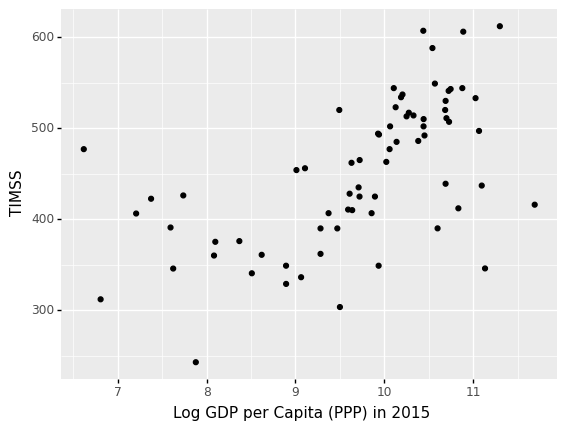

<ggplot: (99306315478)>

In [24]:
TIMSS_GDP.rename(columns={"logGDP": "Log GDP per Capita (PPP) in 2015"}, inplace=True)
ggplot(data=TIMSS_GDP) + \
    geom_point(mapping=aes(x='Log GDP per Capita (PPP) in 2015', y='TIMSS'))

We will also run the same regression analysis to investigate the relationship between logged income and PIRLS score, through the summary table:

In [25]:
PIRLS_GDP.rename(columns={"Log GDP per Capita (PPP) in 2015": "logGDP"}, inplace=True)
pirls_mod = smf.ols("PIRLS ~ logGDP", data=PIRLS_GDP)
pirls_res = pirls_mod.fit()
pirls_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        16:48:21   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
logGDP        43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Again, even though the R-squared value(0.457) is much better than the regression between the income and the TIMSS score, we could get a much better analysis if we would ran a different regression model.

And we will plot the relationship between the PIRLS scores and the logged GDP per capita and get a simple visualization of their relationship:

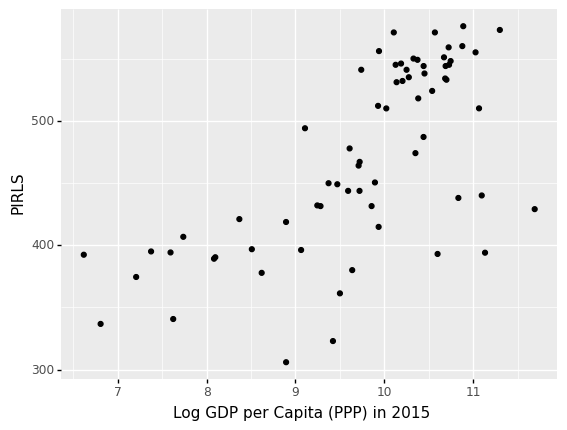

<ggplot: (99300713828)>

In [26]:
PIRLS_GDP.rename(columns={"logGDP": "Log GDP per Capita (PPP) in 2015"}, inplace=True)
ggplot(data=PIRLS_GDP) + \
    geom_point(mapping=aes(x='Log GDP per Capita (PPP) in 2015', y='PIRLS'))

It is a good idea to create a column with the residuals of each analysis, as we are going to need them in the next task:

In [27]:
TIMSS_GDP['TIMSS_residualized'] = timss_res.resid
TIMSS_GDP

,Country Name,Country Code,Series Name,Log GDP per Capita (PPP) in 2015,TIMSS,TIMSS_residualized
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.86,406.65,-50.98
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.01,454.00,31.69
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.69,520.00,27.80
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.70,511.00,18.20
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",9.72,465.00,12.98
...,...,...,...,...,...,...
66,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...",10.06,477.00,10.92
67,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",11.10,437.00,-72.37
68,United States,USA,"GDP per capita, PPP (constant 2011 internation...",10.88,544.00,43.75
69,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",9.90,424.91,-34.28


In [28]:
PIRLS_GDP['PIRLS_residualized'] = pirls_res.resid
PIRLS_GDP

,Country Name,Country Code,Series Name,Log GDP per Capita (PPP) in 2015,PIRLS,PIRLS_residualized
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.86,431.44,-44.04
1,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.69,534.00,22.15
2,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.70,533.00,20.52
3,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",9.72,467.00,-2.58
4,Benin,BEN,"GDP per capita, PPP (constant 2011 internation...",7.59,394.20,18.09
...,...,...,...,...,...,...
63,Togo,TGO,"GDP per capita, PPP (constant 2011 internation...",7.21,374.49,15.38
64,Trinidad and Tobago,TTO,"GDP per capita, PPP (constant 2011 internation...",10.35,474.00,-23.15
65,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",11.10,440.00,-89.92
66,United States,USA,"GDP per capita, PPP (constant 2011 internation...",10.88,560.00,39.68


---

## Years of Schooling and Test Scores

We will explore how much years of schooling impact test scores, taking account of the per capita income, as in Section 4.1 and Figure 6 of the original paper. In order to do that, we will use the residuals of the models we created in Q1. 

>The residuals contain what cannot be explained by income, so we can use them to see how much of what cannot be explained by income can be explained by years of schooling.<br>
>We will use the values reported for 2010.

We are going to read the file which contains average years of schooling data from Barro, Robert J. and Jong-Wha Lee, A New Data Set of Educational Attainment in the World, 1950-2010, Journal of Development Economics, 2013, 104, 194-198:

In [29]:
avg_yrs_school = pd.read_stata('Rosetta Data\BL2013_MF1599_v2.2.dta')
print(avg_yrs_school.shape)
avg_yrs_school.head()

(1898, 20)


,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.00,Algeria,"1,950.00",MF,15.00,999.00,80.68,17.56,3.75,1.45,0.46,0.30,0.16,0.85,0.74,0.09,0.01,"5,241.00",DZA,Middle East and North Africa
1,1.00,Algeria,"1,955.00",MF,15.00,999.00,81.05,17.02,3.46,1.64,0.50,0.26,0.14,0.84,0.73,0.10,0.01,"5,699.00",DZA,Middle East and North Africa
2,1.00,Algeria,"1,960.00",MF,15.00,999.00,82.61,14.31,3.07,2.75,1.05,0.32,0.17,0.88,0.71,0.16,0.01,"6,073.00",DZA,Middle East and North Africa
3,1.00,Algeria,"1,965.00",MF,15.00,999.00,80.93,14.42,4.01,4.21,1.79,0.43,0.23,1.10,0.83,0.25,0.01,"6,374.00",DZA,Middle East and North Africa
4,1.00,Algeria,"1,970.00",MF,15.00,999.00,73.64,19.22,5.23,6.69,3.26,0.34,0.18,1.55,1.16,0.39,0.01,"7,100.00",DZA,Middle East and North Africa


In [30]:
avg_yrs_school['year'].unique()

array([1950., 1955., 1960., 1965., 1970., 1975., 1980., 1985., 1990.,
       1995., 2000., 2005., 2010.])

In [31]:
avg_yrs_school.dtypes

BLcode         float64
country         object
year           float64
sex             object
agefrom        float64
ageto          float64
lu             float32
lp             float32
lpc            float32
ls             float32
lsc            float32
lh             float32
lhc            float32
yr_sch         float32
yr_sch_pri     float32
yr_sch_sec     float32
yr_sch_ter     float32
pop            float64
WBcode          object
region_code     object
dtype: object

In [32]:
avg_yrs_school['year'] = avg_yrs_school['year'].astype(np.int64)

In [33]:
avg_yrs_school.dtypes

BLcode         float64
country         object
year             int64
sex             object
agefrom        float64
ageto          float64
lu             float32
lp             float32
lpc            float32
ls             float32
lsc            float32
lh             float32
lhc            float32
yr_sch         float32
yr_sch_pri     float32
yr_sch_sec     float32
yr_sch_ter     float32
pop            float64
WBcode          object
region_code     object
dtype: object

As said above, we will will only keep the values reported for 2010:

In [34]:
avg_yrs_school_2010 = avg_yrs_school.loc[avg_yrs_school['year'].isin(['2010'])].copy()
print(avg_yrs_school_2010.shape)
avg_yrs_school_2010.head()

(146, 20)


,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.00,Algeria,2010,MF,15.00,999.00,21.12,43.90,25.88,23.21,17.08,11.77,6.66,6.68,4.19,2.12,0.37,"25,853.00",DZA,Middle East and North Africa
25,3.00,Benin,2010,MF,15.00,999.00,53.91,18.66,12.18,23.67,17.77,3.76,2.01,4.43,2.57,1.74,0.12,"5,579.00",BEN,Sub-Saharan Africa
38,4.00,Botswana,2010,MF,15.00,999.00,9.83,6.24,4.76,80.04,29.03,3.89,2.02,9.55,6.26,3.18,0.12,"1,107.00",BWA,Sub-Saharan Africa
51,6.00,Burundi,2010,MF,15.00,999.00,50.43,39.35,25.98,9.18,4.97,1.04,0.54,3.35,2.78,0.53,0.03,"5,068.00",BDI,Sub-Saharan Africa
64,7.00,Cameroon,2010,MF,15.00,999.00,20.73,47.91,31.25,28.29,15.28,3.07,1.64,6.15,4.26,1.80,0.09,"10,766.00",CMR,Sub-Saharan Africa


In [35]:
avg_yrs_school_2010.rename(columns={"WBcode": "Country Code"}, inplace=True)
avg_yrs_school_2010.head()

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,Country Code,region_code
12,1.00,Algeria,2010,MF,15.00,999.00,21.12,43.90,25.88,23.21,17.08,11.77,6.66,6.68,4.19,2.12,0.37,"25,853.00",DZA,Middle East and North Africa
25,3.00,Benin,2010,MF,15.00,999.00,53.91,18.66,12.18,23.67,17.77,3.76,2.01,4.43,2.57,1.74,0.12,"5,579.00",BEN,Sub-Saharan Africa
38,4.00,Botswana,2010,MF,15.00,999.00,9.83,6.24,4.76,80.04,29.03,3.89,2.02,9.55,6.26,3.18,0.12,"1,107.00",BWA,Sub-Saharan Africa
51,6.00,Burundi,2010,MF,15.00,999.00,50.43,39.35,25.98,9.18,4.97,1.04,0.54,3.35,2.78,0.53,0.03,"5,068.00",BDI,Sub-Saharan Africa
64,7.00,Cameroon,2010,MF,15.00,999.00,20.73,47.91,31.25,28.29,15.28,3.07,1.64,6.15,4.26,1.80,0.09,"10,766.00",CMR,Sub-Saharan Africa


Now, we are going to connect each GDP per capita with each corresponding values for years of schooling for each country...

In [36]:
gdp_school2010 = pd.merge(gdp_per_capita, avg_yrs_school_2010, on='Country Code', how='inner')
print(gdp_school2010.shape)
gdp_school2010.head(2)

(138, 24)


,Country Name,Country Code,Series Name,Series Code,GDP Per Capita,BLcode,country,year,sex,agefrom,...,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,region_code
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"1,809.02",79.00,Afghanistan,2010,MF,15.00,...,16.09,8.65,6.88,3.65,3.85,2.64,1.00,0.21,"19,299.00",South Asia
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,"10,971.29",156.00,Albania,2010,MF,15.00,...,85.78,42.90,1.59,0.93,9.93,6.48,3.40,0.05,"2,431.00",Europe and Central Asia


In [37]:
gdp_school2010.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       'GDP Per Capita', 'BLcode', 'country', 'year', 'sex', 'agefrom',
       'ageto', 'lu', 'lp', 'lpc', 'ls', 'lsc', 'lh', 'lhc', 'yr_sch',
       'yr_sch_pri', 'yr_sch_sec', 'yr_sch_ter', 'pop', 'region_code'],
      dtype='object')

In [38]:
gdp_school2010 = gdp_school2010[['Country Name', 'Country Code', 'Series Name', 'GDP Per Capita', 'year', 'yr_sch']]
print(gdp_school2010.shape)
gdp_school2010

(138, 6)


,Country Name,Country Code,Series Name,GDP Per Capita,year,yr_sch
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...","1,809.02",2010,3.85
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...","10,971.29",2010,9.93
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...","13,724.72",2010,6.68
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...","19,101.30",2010,9.51
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...","8,195.93",2010,10.73
...,...,...,...,...,...,...
133,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...","19,831.45",2010,8.17
134,Vietnam,VNM,"GDP per capita, PPP (constant 2011 internation...","5,554.86",2010,7.15
135,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...","2,641.05",2010,3.68
136,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...","3,627.20",2010,7.32


... and then link them to their corresponding TIMSS scores:

In [39]:
gdp_school2010 = pd.merge(gdp_school2010, TIMSS_GDP[['Country Code', 'TIMSS']], on='Country Code', how='left')
gdp_school2010

,Country Name,Country Code,Series Name,GDP Per Capita,year,yr_sch,TIMSS
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...","1,809.02",2010,3.85,nan
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...","10,971.29",2010,9.93,nan
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...","13,724.72",2010,6.68,nan
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...","19,101.30",2010,9.51,406.65
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...","8,195.93",2010,10.73,454.00
...,...,...,...,...,...,...,...
133,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...","19,831.45",2010,8.17,424.91
134,Vietnam,VNM,"GDP per capita, PPP (constant 2011 internation...","5,554.86",2010,7.15,nan
135,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...","2,641.05",2010,3.68,243.00
136,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...","3,627.20",2010,7.32,nan


...and their corresponding PIRLS scores:

In [40]:
gdp_school2010 = pd.merge(gdp_school2010, PIRLS_GDP[['Country Code', 'PIRLS']], on='Country Code', how='left')
gdp_school2010

,Country Name,Country Code,Series Name,GDP Per Capita,year,yr_sch,TIMSS,PIRLS
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...","1,809.02",2010,3.85,nan,nan
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...","10,971.29",2010,9.93,nan,nan
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...","13,724.72",2010,6.68,nan,nan
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...","19,101.30",2010,9.51,406.65,431.44
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...","8,195.93",2010,10.73,454.00,nan
...,...,...,...,...,...,...,...,...
133,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...","19,831.45",2010,8.17,424.91,450.45
134,Vietnam,VNM,"GDP per capita, PPP (constant 2011 internation...","5,554.86",2010,7.15,nan,nan
135,"Yemen, Rep.",YEM,"GDP per capita, PPP (constant 2011 internation...","2,641.05",2010,3.68,243.00,nan
136,Zambia,ZMB,"GDP per capita, PPP (constant 2011 internation...","3,627.20",2010,7.32,nan,nan


We will erase from our dataset all the rows where the TIMSS and PIRLS scores are simultaneously NaN, since we can not use them:

In [41]:
gdp_school2010 = gdp_school2010.dropna(subset=['TIMSS', 'PIRLS'], how='all')

In [42]:
gdp_school2010

,Country Name,Country Code,Series Name,GDP Per Capita,year,yr_sch,TIMSS,PIRLS
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...","19,101.30",2010,9.51,406.65,431.44
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...","8,195.93",2010,10.73,454.00,nan
5,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...","43,719.50",2010,11.54,520.00,534.00
6,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...","44,353.88",2010,9.60,511.00,533.00
7,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...","43,926.47",2010,7.06,439.00,nan
...,...,...,...,...,...,...,...,...
127,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...","23,388.48",2010,7.05,477.00,nan
130,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...","65,975.38",2010,9.07,437.00,440.00
132,United States,USA,"GDP per capita, PPP (constant 2011 internation...","53,029.29",2010,13.18,544.00,560.00
133,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...","19,831.45",2010,8.17,424.91,450.45


In [43]:
gdp_school2010['GDP Per Capita'] = np.log(gdp_school2010['GDP Per Capita'])
gdp_school2010.rename(columns={"GDP Per Capita": "logGDP"}, inplace=True)
gdp_school2010

<ipython-input-43-948240307bcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aliki\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Name,Country Code,Series Name,logGDP,year,yr_sch,TIMSS,PIRLS
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.86,2010,9.51,406.65,431.44
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.01,2010,10.73,454.00,nan
5,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.69,2010,11.54,520.00,534.00
6,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.70,2010,9.60,511.00,533.00
7,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",10.69,2010,7.06,439.00,nan
...,...,...,...,...,...,...,...,...
127,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...",10.06,2010,7.05,477.00,nan
130,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",11.10,2010,9.07,437.00,440.00
132,United States,USA,"GDP per capita, PPP (constant 2011 internation...",10.88,2010,13.18,544.00,560.00
133,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",9.90,2010,8.17,424.91,450.45


Now, we are ready to run a regression analysis in order to investigate the relationship between the years of schooling and the income:

In [44]:
gdp_sch_mod = smf.ols("yr_sch ~ logGDP", data=gdp_school2010)
gdp_sch_res = gdp_sch_mod.fit()
gdp_sch_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     110.6
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           4.74e-16
Time:                        16:48:23   Log-Likelihood:                -138.89
No. Observations:                  72   AIC:                             281.8
Df Residuals:                      70   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1310      1.838     -5.512      0.000     -13.797      -6.465
logGDP         1.9594      0.186     10.515      0.000       1.588       2.331
==============================================================================
Omnibus:                        8.402   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.855
Skew:                          -0.724   Prob(JB):                       0.0197
Kurtosis:                       3.723   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

And we will create a column with the residuals that describe the years of schooling and cannot be explained by income from the regression above, since we are going to need them...

In [45]:
gdp_school2010['Years_of_Schooling_residualized'] = gdp_sch_res.resid
gdp_school2010

<ipython-input-45-ca69020ef43c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Name,Country Code,Series Name,logGDP,year,yr_sch,TIMSS,PIRLS,Years_of_Schooling_residualized
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.86,2010,9.51,406.65,431.44,0.33
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.01,2010,10.73,454.00,nan,3.20
5,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.69,2010,11.54,520.00,534.00,0.74
6,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.70,2010,9.60,511.00,533.00,-1.23
7,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",10.69,2010,7.06,439.00,nan,-3.75
...,...,...,...,...,...,...,...,...,...
127,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...",10.06,2010,7.05,477.00,nan,-2.53
130,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",11.10,2010,9.07,437.00,440.00,-2.55
132,United States,USA,"GDP per capita, PPP (constant 2011 internation...",10.88,2010,13.18,544.00,560.00,2.00
133,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",9.90,2010,8.17,424.91,450.45,-1.09


...and visualize them:

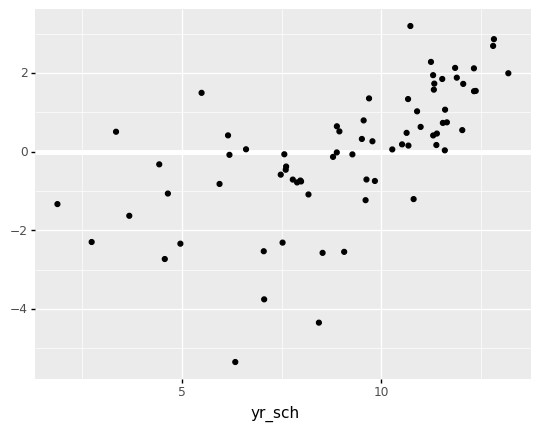

<ggplot: (99300772551)>

In [46]:
ggplot(data=gdp_school2010) +\
    geom_hline(yintercept=0, color='white', size=2) +\
    geom_point(mapping=aes(x='yr_sch', y=gdp_sch_res.resid))

Now, it is time to create the dataset that links the residuals of the TIMSS scores and the years of schooling for each country:

In [47]:
residuals_timss_sch = pd.merge(TIMSS_GDP[['Country Code', 'TIMSS_residualized']], 
                               gdp_school2010[['Country Code', 'Years_of_Schooling_residualized']], on='Country Code', 
                               how='inner')
residuals_timss_sch

,Country Code,TIMSS_residualized,Years_of_Schooling_residualized
0,ARG,-50.98,0.33
1,ARM,31.69,3.20
2,AUS,27.80,0.74
3,AUT,18.20,-1.23
4,BHR,-53.39,-3.75
...,...,...,...
60,TUR,10.92,-2.53
61,ARE,-72.37,-2.55
62,USA,43.75,2.00
63,URY,-34.28,-1.09


We are ready to run the regression analysis between the TIMSS residuals and the Schooling residuals:

In [48]:
timss_school_mod = smf.ols("TIMSS_residualized ~ Years_of_Schooling_residualized", data=residuals_timss_sch)
timss_school_res = timss_school_mod.fit()
timss_school_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     TIMSS_residualized   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     29.30
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.03e-06
Time:                        16:48:24   Log-Likelihood:                -350.69
No. Observations:                  65   AIC:                             705.4
Df Residuals:                      63   BIC:                             709.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.4155      6.734      0.210      0.834     -12.041      14.872
Years_of_Schooling_residualized    21.5856      3.988      5.413      0.000      13.617      29.554
==============================================================================
Omnibus:                        2.751   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.934
Skew:                           0.370   Prob(JB):                        0.380
Kurtosis:                       3.407   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we will also plot the relationship between the residuals of the Years of schooling and the residuals of the TIMSS scores and get a simple visualization of their relationship:

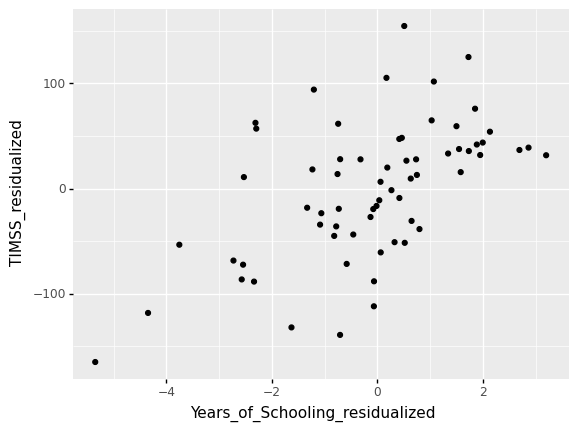

<ggplot: (99300821679)>

In [49]:
ggplot(data=residuals_timss_sch) + \
    geom_point(mapping=aes(x='Years_of_Schooling_residualized', y='TIMSS_residualized'), na_rm=True)

In [50]:
residuals_pirls_sch = pd.merge(PIRLS_GDP[['Country Code', 'PIRLS_residualized']], 
                               gdp_school2010[['Country Code', 'Years_of_Schooling_residualized']], on='Country Code', 
                               how='inner')
residuals_pirls_sch

,Country Code,PIRLS_residualized,Years_of_Schooling_residualized
0,ARG,-44.04,0.33
1,AUS,22.15,0.74
2,AUT,20.52,-1.23
3,BEN,18.09,-0.32
4,BWA,-85.90,0.80
...,...,...,...
58,TGO,15.38,1.50
59,TTO,-23.15,0.48
60,ARE,-89.92,-2.55
61,USA,39.68,2.00


In a similar way, we are going to run a regression analysis between the PIRLS residuals and the Schooling residuals:

In [51]:
pirls_school_mod = smf.ols("PIRLS_residualized ~ Years_of_Schooling_residualized", data=residuals_pirls_sch)
pirls_school_res = pirls_school_mod.fit()
pirls_school_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     PIRLS_residualized   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.96
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.27e-07
Time:                        16:48:24   Log-Likelihood:                -326.38
No. Observations:                  63   AIC:                             656.8
Df Residuals:                      61   BIC:                             661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.6948      5.509      0.126      0.900     -10.320      11.710
Years_of_Schooling_residualized    20.2531      3.475      5.828      0.000      13.304      27.202
==============================================================================
Omnibus:                       14.661   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.484
Skew:                          -0.843   Prob(JB):                     2.16e-05
Kurtosis:                       5.311   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

And we will also plot the relationship between the residuals of the Years of schooling and the residuals of the PIRLS scores and get a simple visualization of their relationship:

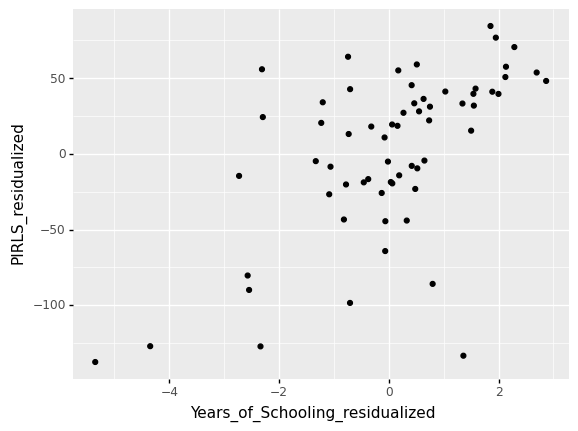

<ggplot: (99300845900)>

In [52]:
ggplot(data=residuals_pirls_sch) + \
    geom_point(mapping=aes(x='Years_of_Schooling_residualized', y='PIRLS_residualized'),na_rm=True)

---

## Compare New and Previous Estimates

To see if the results of the authors make sense, we can compare their scales with other estimates of learning outcomes, as in Section 4.1 and Figure 7 of the original paper. In order to do so, we will run a Spearman test between the new estimates for TIMSS and the previous estimates, and similarly for PIRLS. 

>Use the latest year for which estimates are available for each country.

The dataframe below contains learning outcome estimates from the World Bank.<br>
The percentage of subjects above the 400 mark is given by the `low_threshold` and this can be used to check the new estimates of the authors:

In [53]:
estimates = pd.read_stata('Rosetta Data\HLO Panel Data (mean, thresh) - Jan 2018.dta')
print(estimates.shape)
estimates.head()

(1849, 6)


,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,nan,nan
1,"Abu Dhabi, UAE",7842,ADA,1970,nan,nan
2,"Abu Dhabi, UAE",7842,ADA,1975,nan,nan
3,"Abu Dhabi, UAE",7842,ADA,1980,nan,nan
4,"Abu Dhabi, UAE",7842,ADA,1985,nan,nan


In [54]:
estimates.rename(columns={"cntabb": "Country Code"}, inplace=True)

Let us see how the data look for a random country:

In [55]:
estimates.loc[estimates['Country Code'].isin(['ARM'])]

,country,idcntry,Country Code,year,HLO,low_threshold
55,Armenia,51,ARM,1965,nan,nan
56,Armenia,51,ARM,1970,nan,nan
57,Armenia,51,ARM,1975,nan,nan
58,Armenia,51,ARM,1980,nan,nan
59,Armenia,51,ARM,1985,nan,nan
60,Armenia,51,ARM,1990,nan,nan
61,Armenia,51,ARM,1995,nan,nan
62,Armenia,51,ARM,2000,nan,nan
63,Armenia,51,ARM,2005,482.68,87.98
64,Armenia,51,ARM,2010,469.07,86.13


We need to use the latest year for which estimates are available for each country. So...

These are the years that we have..

In [56]:
estimates['year'].value_counts()

2015    169
2005    169
2000    169
1990    169
2010    168
1995    168
1985    168
1975    168
1970    168
1965    168
1980    165
Name: year, dtype: int64

...but, we do not know yet which year is the last or each country.<br>
And we have 172 different countries in total:

In [57]:
len(estimates['Country Code'].unique())

172

In [58]:
estimates.isna().sum()

country             0
idcntry             0
Country Code        0
year                0
HLO              1223
low_threshold    1223
dtype: int64

In [59]:
estimates.dropna(inplace=True)
estimates.reset_index(drop=True, inplace=True)
print(estimates.shape)
estimates.head()

(626, 6)


,country,idcntry,Country Code,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,2010,428.68,73.83
1,"Abu Dhabi, UAE",7842,ADA,2015,437.07,73.75
2,Albania,8,ALB,2000,400.65,57.75
3,Albania,8,ALB,2005,399.32,60.15
4,Albania,8,ALB,2010,402.75,61.32


Now, we are going to create a dataset with the last year reported for each country. <br>
In order to do so, we will first create a dataset with all the countries that are reported for 2015, since 2015 is the latest year that we have information for, as we saw above. <br>Then we will keep on adding the countries that were not included in the new dataset and have 2010 as the latest year, then 2005 and so on:

In [60]:
estimates_2015 = estimates.loc[estimates['year'].isin(['2015'])].copy()
print(estimates_2015.shape)
estimates_2015.reset_index(drop=True, inplace=True)
estimates_2015

(99, 6)


,country,idcntry,Country Code,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,2015,437.07,73.75
1,Albania,8,ALB,2015,436.73,70.65
2,Algeria,12,DZA,2015,375.14,51.31
3,Argentina,32,ARG,2015,429.38,70.86
4,"Argentina, Buenos Aires",974,ARB,2015,414.19,67.75
...,...,...,...,...,...,...
94,USA,840,USA,2015,529.09,93.30
95,United Arab Emirates,784,ARE,2015,460.49,80.84
96,United Kingdom,826,GBR,2015,515.80,88.62
97,Uruguay,858,URY,2015,445.45,72.65


In [61]:
array_2015 = estimates_2015['Country Code'].unique()
array_2015

array(['ADA', 'ALB', 'DZA', 'ARG', 'ARB', 'AUS', 'AUT', 'BHR', 'BEL',
       'BFL', 'BWA', 'BRA', 'BGR', 'CAN', 'COT', 'CQU', 'CHL', 'CHN',
       'TWN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'DOM', 'ADU',
       'ECU', 'EGY', 'ENG', 'EST', 'FIN', 'FRA', 'GEO', 'DEU', 'GRC',
       'GTM', 'HKG', 'HUN', 'ISL', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA',
       'JPN', 'JOR', 'KAZ', 'KOR', 'KWT', 'LVA', 'LBN', 'LTU', 'LUX',
       'MAC', 'MKD', 'MYS', 'MLT', 'QUC', 'MEX', 'NMX', 'MDA', 'MNE',
       'MAR', 'NLD', 'NZL', 'NIC', 'US4', 'NIR', 'NOR', 'OMN', 'PAN',
       'PRY', 'PER', 'POL', 'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'SAU',
       'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'ESR', 'SWE', 'CHE',
       'THA', 'TTO', 'TUN', 'TUR', 'USA', 'ARE', 'GBR', 'URY', 'VNM'],
      dtype=object)

These are the countries that we already have in our new dataset:

In [62]:
countries_2015 = pd.DataFrame(array_2015, columns=['Country Code'])
countries_2015

,Country Code
0,ADA
1,ALB
2,DZA
3,ARG
4,ARB
...,...
94,USA
95,ARE
96,GBR
97,URY


In [63]:
len(estimates['Country Code'].unique())

158

In [64]:
array = estimates['Country Code'].unique()
array

array(['ADA', 'ALB', 'DZA', 'ARG', 'ARB', 'ARM', 'AUS', 'AUT', 'AZE',
       'BHR', 'BSQ', 'BEL', 'BFL', 'BFR', 'BEN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BGR', 'BFA', 'BDI', 'CMR', 'CAN', 'CAB', 'CBC', 'CNS',
       'COT', 'CQU', 'TCD', 'CHL', 'CHN', 'TWN', 'COL', 'COM', 'CRI',
       'HRV', 'CUB', 'CYP', 'CZE', 'CIV', 'COD', 'DNK', 'DOM', 'ADU',
       'ECU', 'EGY', 'SLV', 'ENG', 'EST', 'FIN', 'FRA', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GRC', 'GTM', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'UIN', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KOR', 'KWT', 'KGZ', 'LVA', 'LBN', 'LSO', 'LBR',
       'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MLI',
       'MLT', 'QUC', 'MUS', 'MEX', 'NMX', 'UMN', 'MDA', 'MNG', 'MNE',
       'MAR', 'MOZ', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA',
       'US4', 'NIR', 'NOR', 'PSE', 'OMN', 'PAK', 'PAN', 'PRY', 'PER',
       'PHL', 'POL', 'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'SAU', 'SCO',
       'SEN', 'SRB',

These are all the countries together:

In [65]:
countries = pd.DataFrame(array, columns=['Country Code'])
countries

,Country Code
0,ADA
1,ALB
2,DZA
3,ARG
4,ARB
...,...
153,VNM
154,YEM
155,ZMB
156,ZAN


And these are the countries that are missing from the new dataset (aka the ones that do not have 2015 as the latest year):

In [66]:
countries_new = countries.merge(countries_2015,how='left',indicator=True).loc[lambda x:x['_merge']!='both']
print(countries_new.shape)
countries_new.head()

(59, 2)


,Country Code,_merge
5,ARM,left_only
8,AZE,left_only
10,BSQ,left_only
13,BFR,left_only
14,BEN,left_only


We merge our dataframe with the countries_new dataframe in order to get the countries that do not have 2015 as their latest year:

In [67]:
countries_not_2015 = pd.merge(countries_new, estimates, on='Country Code', how='inner')
print(countries_not_2015.shape)
countries_not_2015.head()

(126, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
0,ARM,left_only,Armenia,51,2005,482.68,87.98
1,ARM,left_only,Armenia,51,2010,469.07,86.13
2,AZE,left_only,Azerbaijan,31,2005,503.38,94.39
3,AZE,left_only,Azerbaijan,31,2010,453.14,77.46
4,BSQ,left_only,"Basque Country, Spain",3724,2005,497.81,93.41


In [68]:
estimates_2010 = countries_not_2015.loc[countries_not_2015['year'].isin(['2010'])].copy()
print(estimates_2010.shape)
estimates_2010.head()

(20, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
1,ARM,left_only,Armenia,51,2010,469.07,86.13
3,AZE,left_only,Azerbaijan,31,2010,453.14,77.46
17,BDI,left_only,Burundi,108,2010,332.33,47.54
22,CAB,left_only,"Canada, Alberta",9134,2010,503.89,94.26
31,TCD,left_only,Chad,148,2010,300.46,44.04


And now, we have a dataset that includes the countries that have 2015 as their latest year and the ones that have 2010 as their latest year:

In [69]:
estimates_1015 = pd.concat([estimates_2010, estimates_2015])
print(estimates_1015.shape)
estimates_1015.head()

(119, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
1,ARM,left_only,Armenia,51,2010,469.07,86.13
3,AZE,left_only,Azerbaijan,31,2010,453.14,77.46
17,BDI,left_only,Burundi,108,2010,332.33,47.54
22,CAB,left_only,"Canada, Alberta",9134,2010,503.89,94.26
31,TCD,left_only,Chad,148,2010,300.46,44.04


We will repeat the same steps below as above, until we get the final dataset with the latest year for each country.

In [70]:
array_1015 = estimates_1015['Country Code'].unique()
array_1015

array(['ARM', 'AZE', 'BDI', 'CAB', 'TCD', 'COM', 'CIV', 'COD', 'GHA',
       'HND', 'IND', 'KGZ', 'LIE', 'MUS', 'PSE', 'SYR', 'TGO', 'UKR',
       'VEN', 'YEM', 'ADA', 'ALB', 'DZA', 'ARG', 'ARB', 'AUS', 'AUT',
       'BHR', 'BEL', 'BFL', 'BWA', 'BRA', 'BGR', 'CAN', 'COT', 'CQU',
       'CHL', 'CHN', 'TWN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK',
       'DOM', 'ADU', 'ECU', 'EGY', 'ENG', 'EST', 'FIN', 'FRA', 'GEO',
       'DEU', 'GRC', 'GTM', 'HKG', 'HUN', 'ISL', 'IDN', 'IRN', 'IRL',
       'ISR', 'ITA', 'JPN', 'JOR', 'KAZ', 'KOR', 'KWT', 'LVA', 'LBN',
       'LTU', 'LUX', 'MAC', 'MKD', 'MYS', 'MLT', 'QUC', 'MEX', 'NMX',
       'MDA', 'MNE', 'MAR', 'NLD', 'NZL', 'NIC', 'US4', 'NIR', 'NOR',
       'OMN', 'PAN', 'PRY', 'PER', 'POL', 'PRT', 'PRI', 'QAT', 'ROU',
       'RUS', 'SAU', 'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'ESR',
       'SWE', 'CHE', 'THA', 'TTO', 'TUN', 'TUR', 'USA', 'ARE', 'GBR',
       'URY', 'VNM'], dtype=object)

In [71]:
countries_1015 = pd.DataFrame(array_1015, columns=['Country Code'])
countries_1015 .head()

,Country Code
0,ARM
1,AZE
2,BDI
3,CAB
4,TCD


In [72]:
countries_new = countries.merge(countries_1015,how='left',indicator=True).loc[lambda x:x['_merge']!='both']
print(countries_new.shape)
countries_new.head()

(39, 2)


,Country Code,_merge
10,BSQ,left_only
13,BFR,left_only
14,BEN,left_only
15,BOL,left_only
16,BIH,left_only


In [73]:
countries_not_1015 = pd.merge(countries_new, estimates, on='Country Code', how='inner')
print(countries_not_1015.shape)
countries_not_1015

(83, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
0,BSQ,left_only,"Basque Country, Spain",3724,2005,497.81,93.41
1,BFR,left_only,Belgium French,5601,1970,191.17,95.38
2,BFR,left_only,Belgium French,5601,1975,305.11,94.30
3,BFR,left_only,Belgium French,5601,1980,298.52,93.30
4,BFR,left_only,Belgium French,5601,1985,479.97,85.16
...,...,...,...,...,...,...,...
78,ZMB,left_only,Zambia,894,2005,324.46,27.50
79,ZAN,left_only,Zanzibar,9834,1995,347.70,17.84
80,ZAN,left_only,Zanzibar,9834,2000,310.54,34.33
81,ZAN,left_only,Zanzibar,9834,2005,321.88,38.04


In [74]:
estimates_2005 = countries_not_1015.loc[countries_not_1015['year'].isin(['2005'])].copy()
print(estimates_2005.shape)
estimates_2005

(28, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
0,BSQ,left_only,"Basque Country, Spain",3724,2005,497.81,93.41
7,BEN,left_only,Benin,204,2005,279.03,24.35
9,BIH,left_only,Bosnia and Herzegovina,70,2005,460.77,82.44
11,BFA,left_only,Burkina Faso,854,2005,296.88,37.14
13,CMR,left_only,Cameroun,120,2005,336.64,44.50
19,CBC,left_only,"Canada, British Colombia",9135,2005,510.80,92.73
22,CUB,left_only,Cuba,192,2005,507.91,84.49
23,SLV,left_only,El Salvador,222,2005,363.87,50.82
24,GAB,left_only,Gabon,266,2005,324.76,35.11
26,UIN,left_only,"Indiana State, USA",9140,2005,522.61,93.74


In [75]:
estimates_051015 = pd.concat([estimates_1015, estimates_2005])
print(estimates_051015.shape)
estimates_051015

(147, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
1,ARM,left_only,Armenia,51,2010,469.07,86.13
3,AZE,left_only,Azerbaijan,31,2010,453.14,77.46
17,BDI,left_only,Burundi,108,2010,332.33,47.54
22,CAB,left_only,"Canada, Alberta",9134,2010,503.89,94.26
31,TCD,left_only,Chad,148,2010,300.46,44.04
...,...,...,...,...,...,...,...
73,TZA,left_only,Tanzania United Republic,834,2005,352.92,57.32
75,UGA,left_only,Uganda,800,2005,329.42,39.07
78,ZMB,left_only,Zambia,894,2005,324.46,27.50
81,ZAN,left_only,Zanzibar,9834,2005,321.88,38.04


In [76]:
array_051015 = estimates_051015['Country Code'].unique()
array_051015

array(['ARM', 'AZE', 'BDI', 'CAB', 'TCD', 'COM', 'CIV', 'COD', 'GHA',
       'HND', 'IND', 'KGZ', 'LIE', 'MUS', 'PSE', 'SYR', 'TGO', 'UKR',
       'VEN', 'YEM', 'ADA', 'ALB', 'DZA', 'ARG', 'ARB', 'AUS', 'AUT',
       'BHR', 'BEL', 'BFL', 'BWA', 'BRA', 'BGR', 'CAN', 'COT', 'CQU',
       'CHL', 'CHN', 'TWN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK',
       'DOM', 'ADU', 'ECU', 'EGY', 'ENG', 'EST', 'FIN', 'FRA', 'GEO',
       'DEU', 'GRC', 'GTM', 'HKG', 'HUN', 'ISL', 'IDN', 'IRN', 'IRL',
       'ISR', 'ITA', 'JPN', 'JOR', 'KAZ', 'KOR', 'KWT', 'LVA', 'LBN',
       'LTU', 'LUX', 'MAC', 'MKD', 'MYS', 'MLT', 'QUC', 'MEX', 'NMX',
       'MDA', 'MNE', 'MAR', 'NLD', 'NZL', 'NIC', 'US4', 'NIR', 'NOR',
       'OMN', 'PAN', 'PRY', 'PER', 'POL', 'PRT', 'PRI', 'QAT', 'ROU',
       'RUS', 'SAU', 'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'ESR',
       'SWE', 'CHE', 'THA', 'TTO', 'TUN', 'TUR', 'USA', 'ARE', 'GBR',
       'URY', 'VNM', 'BSQ', 'BEN', 'BIH', 'BFA', 'CMR', 'CBC', 'CUB',
       'SLV', 'GAB',

In [77]:
countries_051015 = pd.DataFrame(array_051015, columns=['Country Code'])
countries_051015 

,Country Code
0,ARM
1,AZE
2,BDI
3,CAB
4,TCD
...,...
142,TZA
143,UGA
144,ZMB
145,ZAN


In [78]:
countries_new = countries.merge(countries_051015,how='left',indicator=True).loc[lambda x:x['_merge']!='both']
print(countries_new.shape)
countries_new

(11, 2)


,Country Code,_merge
13,BFR,left_only
15,BOL,left_only
26,CNS,left_only
53,GMB,left_only
80,LBR,left_only
89,MLI,left_only
102,NPL,left_only
106,NER,left_only
107,NGA,left_only
113,PAK,left_only


In [79]:
countries_not_051015 = pd.merge(countries_new, estimates, on='Country Code', how='inner')
print(countries_not_051015.shape)
countries_not_051015

(16, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
0,BFR,left_only,Belgium French,5601,1970,191.17,95.38
1,BFR,left_only,Belgium French,5601,1975,305.11,94.30
2,BFR,left_only,Belgium French,5601,1980,298.52,93.30
3,BFR,left_only,Belgium French,5601,1985,479.97,85.16
4,BFR,left_only,Belgium French,5601,1990,491.49,88.23
5,BFR,left_only,Belgium French,5601,1995,500.39,93.32
6,BOL,left_only,Bolivia Plurinational State of,68,1995,370.40,53.61
7,CNS,left_only,"Canada, Nova Scotia",9136,1990,468.44,82.60
8,GMB,left_only,Gambia,270,2000,267.32,36.53
9,LBR,left_only,Liberia,430,2000,273.71,37.90


In [80]:
estimates_2000 = countries_not_051015.loc[countries_not_051015['year'].isin(['2000'])].copy()
print(estimates_2000.shape)
estimates_2000

(7, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
8,GMB,left_only,Gambia,270,2000,267.32,36.53
9,LBR,left_only,Liberia,430,2000,273.71,37.90
10,MLI,left_only,Mali,466,2000,170.91,5.39
11,NPL,left_only,Nepal,524,2000,189.48,19.79
12,NER,left_only,Niger,562,2000,147.45,0.00
14,PAK,left_only,Pakistan,586,2000,367.83,58.13
15,LKA,left_only,Sri Lanka,144,2000,292.30,41.90


In [81]:
estimates_00051015 = pd.concat([estimates_051015, estimates_2000])
print(estimates_00051015.shape)
estimates_00051015

(154, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
1,ARM,left_only,Armenia,51,2010,469.07,86.13
3,AZE,left_only,Azerbaijan,31,2010,453.14,77.46
17,BDI,left_only,Burundi,108,2010,332.33,47.54
22,CAB,left_only,"Canada, Alberta",9134,2010,503.89,94.26
31,TCD,left_only,Chad,148,2010,300.46,44.04
...,...,...,...,...,...,...,...
10,MLI,left_only,Mali,466,2000,170.91,5.39
11,NPL,left_only,Nepal,524,2000,189.48,19.79
12,NER,left_only,Niger,562,2000,147.45,0.00
14,PAK,left_only,Pakistan,586,2000,367.83,58.13


In [82]:
array_00051015 = estimates_00051015['Country Code'].unique()
array_00051015

array(['ARM', 'AZE', 'BDI', 'CAB', 'TCD', 'COM', 'CIV', 'COD', 'GHA',
       'HND', 'IND', 'KGZ', 'LIE', 'MUS', 'PSE', 'SYR', 'TGO', 'UKR',
       'VEN', 'YEM', 'ADA', 'ALB', 'DZA', 'ARG', 'ARB', 'AUS', 'AUT',
       'BHR', 'BEL', 'BFL', 'BWA', 'BRA', 'BGR', 'CAN', 'COT', 'CQU',
       'CHL', 'CHN', 'TWN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK',
       'DOM', 'ADU', 'ECU', 'EGY', 'ENG', 'EST', 'FIN', 'FRA', 'GEO',
       'DEU', 'GRC', 'GTM', 'HKG', 'HUN', 'ISL', 'IDN', 'IRN', 'IRL',
       'ISR', 'ITA', 'JPN', 'JOR', 'KAZ', 'KOR', 'KWT', 'LVA', 'LBN',
       'LTU', 'LUX', 'MAC', 'MKD', 'MYS', 'MLT', 'QUC', 'MEX', 'NMX',
       'MDA', 'MNE', 'MAR', 'NLD', 'NZL', 'NIC', 'US4', 'NIR', 'NOR',
       'OMN', 'PAN', 'PRY', 'PER', 'POL', 'PRT', 'PRI', 'QAT', 'ROU',
       'RUS', 'SAU', 'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'ESR',
       'SWE', 'CHE', 'THA', 'TTO', 'TUN', 'TUR', 'USA', 'ARE', 'GBR',
       'URY', 'VNM', 'BSQ', 'BEN', 'BIH', 'BFA', 'CMR', 'CBC', 'CUB',
       'SLV', 'GAB',

In [83]:
countries_00051015 = pd.DataFrame(array_00051015, columns=['Country Code'])
countries_00051015 

,Country Code
0,ARM
1,AZE
2,BDI
3,CAB
4,TCD
...,...
149,MLI
150,NPL
151,NER
152,PAK


In [84]:
countries_new = countries.merge(countries_00051015,how='left',indicator=True).loc[lambda x:x['_merge']!='both']
print(countries_new.shape)
countries_new

(4, 2)


,Country Code,_merge
13,BFR,left_only
15,BOL,left_only
26,CNS,left_only
107,NGA,left_only


In [85]:
countries_not_00051015 = pd.merge(countries_new, estimates, on='Country Code', how='inner')
print(countries_not_00051015.shape)
countries_not_00051015

(9, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
0,BFR,left_only,Belgium French,5601,1970,191.17,95.38
1,BFR,left_only,Belgium French,5601,1975,305.11,94.30
2,BFR,left_only,Belgium French,5601,1980,298.52,93.30
3,BFR,left_only,Belgium French,5601,1985,479.97,85.16
4,BFR,left_only,Belgium French,5601,1990,491.49,88.23
5,BFR,left_only,Belgium French,5601,1995,500.39,93.32
6,BOL,left_only,Bolivia Plurinational State of,68,1995,370.40,53.61
7,CNS,left_only,"Canada, Nova Scotia",9136,1990,468.44,82.60
8,NGA,left_only,Nigeria,566,1995,241.18,45.02


In [86]:
estimates_1995 = countries_not_00051015.loc[countries_not_00051015['year'].isin(['1995'])].copy()
print(estimates_1995.shape)
estimates_1995

(3, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
5,BFR,left_only,Belgium French,5601,1995,500.39,93.32
6,BOL,left_only,Bolivia Plurinational State of,68,1995,370.40,53.61
8,NGA,left_only,Nigeria,566,1995,241.18,45.02


In [87]:
estimates_9515 = pd.concat([estimates_00051015, estimates_1995])
print(estimates_9515.shape)
estimates_9515

(157, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
1,ARM,left_only,Armenia,51,2010,469.07,86.13
3,AZE,left_only,Azerbaijan,31,2010,453.14,77.46
17,BDI,left_only,Burundi,108,2010,332.33,47.54
22,CAB,left_only,"Canada, Alberta",9134,2010,503.89,94.26
31,TCD,left_only,Chad,148,2010,300.46,44.04
...,...,...,...,...,...,...,...
14,PAK,left_only,Pakistan,586,2000,367.83,58.13
15,LKA,left_only,Sri Lanka,144,2000,292.30,41.90
5,BFR,left_only,Belgium French,5601,1995,500.39,93.32
6,BOL,left_only,Bolivia Plurinational State of,68,1995,370.40,53.61


In [88]:
array_9515 = estimates_9515['Country Code'].unique()
array_9515

array(['ARM', 'AZE', 'BDI', 'CAB', 'TCD', 'COM', 'CIV', 'COD', 'GHA',
       'HND', 'IND', 'KGZ', 'LIE', 'MUS', 'PSE', 'SYR', 'TGO', 'UKR',
       'VEN', 'YEM', 'ADA', 'ALB', 'DZA', 'ARG', 'ARB', 'AUS', 'AUT',
       'BHR', 'BEL', 'BFL', 'BWA', 'BRA', 'BGR', 'CAN', 'COT', 'CQU',
       'CHL', 'CHN', 'TWN', 'COL', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK',
       'DOM', 'ADU', 'ECU', 'EGY', 'ENG', 'EST', 'FIN', 'FRA', 'GEO',
       'DEU', 'GRC', 'GTM', 'HKG', 'HUN', 'ISL', 'IDN', 'IRN', 'IRL',
       'ISR', 'ITA', 'JPN', 'JOR', 'KAZ', 'KOR', 'KWT', 'LVA', 'LBN',
       'LTU', 'LUX', 'MAC', 'MKD', 'MYS', 'MLT', 'QUC', 'MEX', 'NMX',
       'MDA', 'MNE', 'MAR', 'NLD', 'NZL', 'NIC', 'US4', 'NIR', 'NOR',
       'OMN', 'PAN', 'PRY', 'PER', 'POL', 'PRT', 'PRI', 'QAT', 'ROU',
       'RUS', 'SAU', 'SRB', 'SGP', 'SVK', 'SVN', 'ZAF', 'ESP', 'ESR',
       'SWE', 'CHE', 'THA', 'TTO', 'TUN', 'TUR', 'USA', 'ARE', 'GBR',
       'URY', 'VNM', 'BSQ', 'BEN', 'BIH', 'BFA', 'CMR', 'CBC', 'CUB',
       'SLV', 'GAB',

In [89]:
countries_9515 = pd.DataFrame(array_9515, columns=['Country Code'])
countries_9515

,Country Code
0,ARM
1,AZE
2,BDI
3,CAB
4,TCD
...,...
152,PAK
153,LKA
154,BFR
155,BOL


In [90]:
countries_new = countries.merge(countries_9515,how='left',indicator=True).loc[lambda x:x['_merge']!='both']
print(countries_new.shape)
countries_new

(1, 2)


,Country Code,_merge
26,CNS,left_only


In [91]:
estimates_1990 = pd.merge(countries_new, estimates, on='Country Code', how='inner')
print(estimates_1990.shape)
estimates_1990

(1, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
0,CNS,left_only,"Canada, Nova Scotia",9136,1990,468.44,82.60


Here, you can see the final dataset, as promised above:

In [92]:
estimates_final = pd.concat([estimates_9515, estimates_1990])
print(estimates_final.shape)
estimates_final.reset_index(drop=True, inplace=True)
estimates_final

(158, 7)


,Country Code,_merge,country,idcntry,year,HLO,low_threshold
0,ARM,left_only,Armenia,51,2010,469.07,86.13
1,AZE,left_only,Azerbaijan,31,2010,453.14,77.46
2,BDI,left_only,Burundi,108,2010,332.33,47.54
3,CAB,left_only,"Canada, Alberta",9134,2010,503.89,94.26
4,TCD,left_only,Chad,148,2010,300.46,44.04
...,...,...,...,...,...,...,...
153,LKA,left_only,Sri Lanka,144,2000,292.30,41.90
154,BFR,left_only,Belgium French,5601,1995,500.39,93.32
155,BOL,left_only,Bolivia Plurinational State of,68,1995,370.40,53.61
156,NGA,left_only,Nigeria,566,1995,241.18,45.02


In [93]:
estimates_final = estimates_final[['Country Code', 'country', 'year', 'HLO', 'low_threshold']]
estimates_final

,Country Code,country,year,HLO,low_threshold
0,ARM,Armenia,2010,469.07,86.13
1,AZE,Azerbaijan,2010,453.14,77.46
2,BDI,Burundi,2010,332.33,47.54
3,CAB,"Canada, Alberta",2010,503.89,94.26
4,TCD,Chad,2010,300.46,44.04
...,...,...,...,...,...
153,LKA,Sri Lanka,2000,292.30,41.90
154,BFR,Belgium French,1995,500.39,93.32
155,BOL,Bolivia Plurinational State of,1995,370.40,53.61
156,NGA,Nigeria,1995,241.18,45.02


Now that we have kept the latest year for which estimates are available for each country, we will merge the dataframe with the TIMSS and PIRLS scores:

In [94]:
estimates_scores = pd.merge(country_scores, estimates_final, on='Country Code', how='inner')
print(estimates_scores.shape)
estimates_scores.head()

(77, 10)


,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",country,year,HLO,low_threshold
0,U.A.E.,ARE,64.00,63.98,437.00,440.00,United Arab Emirates,2015,460.49,80.84
1,Argentina,ARG,51.00,66.00,406.65,431.44,Argentina,2015,429.38,70.86
2,Armenia,ARM,71.51,nan,454.00,nan,Armenia,2010,469.07,86.13
3,Australia,AUS,90.00,92.93,520.00,534.00,Australia,2015,509.22,91.53
4,Austria,AUT,95.30,97.10,511.00,533.00,Austria,2015,519.54,88.51


In [95]:
estimates_scores = estimates_scores[['Country', 'Country Code', 'Percent Above Math Benchmark (400 on TIMSS Scale)', 
                                      'Percent Above Reading Benchmark (400 on PIRLS Scale)','year', 'low_threshold']]
print(estimates_scores.shape)
estimates_scores.head()

(77, 6)


,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),year,low_threshold
0,U.A.E.,ARE,64.00,63.98,2015,80.84
1,Argentina,ARG,51.00,66.00,2015,70.86
2,Armenia,ARM,71.51,nan,2010,86.13
3,Australia,AUS,90.00,92.93,2015,91.53
4,Austria,AUT,95.30,97.10,2015,88.51


In [96]:
estimates_scores.rename(columns={"Percent Above Math Benchmark (400 on TIMSS Scale)": "TIMSS"}, inplace=True)
estimates_scores.rename(columns={"Percent Above Reading Benchmark (400 on PIRLS Scale)": "PIRLS"}, inplace=True)
estimates_scores.head()

,Country,Country Code,TIMSS,PIRLS,year,low_threshold
0,U.A.E.,ARE,64.00,63.98,2015,80.84
1,Argentina,ARG,51.00,66.00,2015,70.86
2,Armenia,ARM,71.51,nan,2010,86.13
3,Australia,AUS,90.00,92.93,2015,91.53
4,Austria,AUT,95.30,97.10,2015,88.51


We set the values that we will use in the Spearman test:

In [97]:
X = estimates_scores.low_threshold.values
Y = estimates_scores.TIMSS.values
Z = estimates_scores.PIRLS.values

The results of the Spearman test between the previous and the new estimates of the TIMSS score are:

In [98]:
print('Spearman for TIMSS is:', stats.spearmanr(X,Y, nan_policy='omit'))

Spearman for TIMSS is: SpearmanrResult(correlation=0.8973790562032016, pvalue=1.687973764124364e-25)


> As you can see, there is a strong correlation between the the previous and the new estimates of the TIMSS score, which leads us to the conclusion that the results of the authors are meaningful.

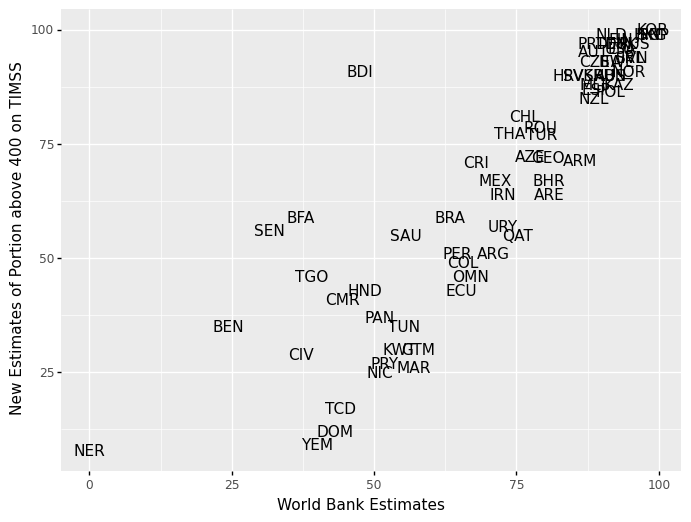

<ggplot: (99307065501)>

In [99]:
ggplot(data=estimates_scores, mapping=aes(x='low_threshold', y='TIMSS')) +\
    labs(x='World Bank Estimates', y='New Estimates of Portion above 400 on TIMSS') +\
    geom_text(mapping=aes(label='Country Code'), na_rm=True) +\
    theme(figure_size=(8, 6))

The results of the Spearman test between the previous and the new estimates of the PIRLS score are:

In [100]:
print('Spearman for PIRLS is:', stats.spearmanr(X,Z, nan_policy='omit'))

Spearman for PIRLS is: SpearmanrResult(correlation=0.9045173418249433, pvalue=5.290584772193416e-25)


> Τhere is also a strong correlation between the the previous and the new estimates of the TIMSS score, which leads us to the conclusion that the results of the authors about the PIRLS scores are also meaningful.

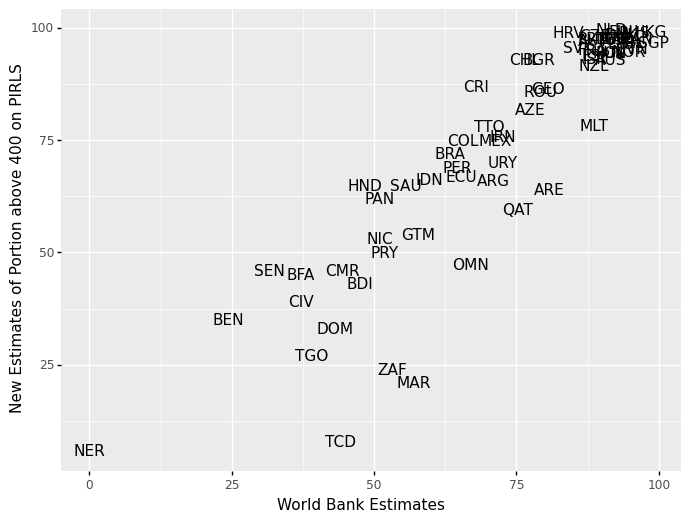

<ggplot: (99300861428)>

In [101]:
ggplot(data=estimates_scores, mapping=aes(x='low_threshold', y='PIRLS')) +\
    labs(x='World Bank Estimates', y='New Estimates of Portion above 400 on PIRLS') +\
    geom_text(mapping=aes(label='Country Code'), na_rm=True) +\
    theme(figure_size=(8, 6))

---

## Income and Test Results

Last but not least, we are going to study the relationship between the skills of the people in each country and the value of its exports, as described in Section 4.2 of the original paper:

We are going to read the US census data for the year 2000 in order to identify college graduates, using the rule that they have at least 10 years of education and the high school graduates, using the rule that they have at least 6 years of education. 

> For every different industry in the census data, we are going to calculate the weighted average, for that industry, of college graduates and high school graduates. 
> We will use the PERWT attribute, which shows how many persons in the US population are represented by a given person in the data.

In [102]:
usa_00001 = pd.read_csv(r'Rosetta Data\usa_00001.csv')
print(usa_00001.shape)
usa_00001.head()

(371618, 15)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.00,2000000000014,17,1,1,618.00,8,81,1,10,3130,797
1,2000,200004,1,600.00,2000000000014,17,1,2,684.00,8,81,1,10,7210,467
2,2000,200004,2,600.00,2000000000024,48,1,1,618.00,6,62,1,10,8030,359
3,2000,200004,2,600.00,2000000000024,48,1,2,609.00,6,62,3,30,5240,617
4,2000,200004,2,600.00,2000000000024,48,1,3,621.00,6,62,1,10,9360,877


And we will group the dataset by Industry:

In [103]:
usa_00001_grouped = usa_00001.groupby(['IND']).sum()
usa_00001_grouped.head()

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,
0,287412000,28741774824,11347780503,"105,886,600.00",287412113478381696,3976219,143905,405211,"108,371,644.00",441309,4611907,186255,1862550,1425563520
17,4108000,410808216,168770778,"1,358,700.00",4108001687715996,55754,2058,3758,"1,391,515.00",11546,118815,3349,33540,6728580
18,2200000,220004400,86906943,"714,200.00",2200000869073830,35960,1100,1827,"723,084.00",6574,67690,1537,15392,2961705
19,108000,10800216,4782790,"32,450.00",108000047828116,1563,54,78,"32,080.00",428,4376,80,800,185445
27,402000,40200804,15975850,"142,650.00",402000159759304,5862,201,311,"147,320.00",1132,11669,270,2708,1290575


In [104]:
usa_00001['EDUC'].unique()

array([ 8,  6, 10, 11,  4,  7,  2,  3,  0,  1,  5], dtype=int64)

In [105]:
usa_00001.YEAR.unique()

array([2000], dtype=int64)

We create the dataset with the college graduates ...

In [106]:
college_graduates = usa_00001.loc[usa_00001['EDUC'].isin(['10', '11'])].copy()
print(college_graduates.shape)
college_graduates.head()

(69972, 15)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
8,2000,200004,5,600.00,2000000000054,12,1,1,603.00,10,101,3,30,700,959
13,2000,200004,7,600.00,2000000000074,6,1,1,628.00,10,101,1,10,3300,819
14,2000,200004,7,600.00,2000000000074,6,1,2,708.00,11,114,1,10,2600,657
20,2000,200004,11,600.00,2000000000114,17,1,2,518.00,11,116,1,10,2010,837
21,2000,200004,12,200.00,2000000000124,11,1,1,214.00,10,101,3,30,30,668


...and the dataset with the high school graduates:

In [107]:
high_school_graduates = usa_00001.loc[usa_00001['EDUC'].isin(['6', '7', '8', '10', '11'])].copy()
print(high_school_graduates.shape)
high_school_graduates.head()

(242038, 15)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.00,2000000000014,17,1,1,618.00,8,81,1,10,3130,797
1,2000,200004,1,600.00,2000000000014,17,1,2,684.00,8,81,1,10,7210,467
2,2000,200004,2,600.00,2000000000024,48,1,1,618.00,6,62,1,10,8030,359
3,2000,200004,2,600.00,2000000000024,48,1,2,609.00,6,62,3,30,5240,617
4,2000,200004,2,600.00,2000000000024,48,1,3,621.00,6,62,1,10,9360,877


We group the dataset by Industry:

In [108]:
college = college_graduates.groupby(['IND']).sum()
print(college.shape)
college.head()

(265, 14)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,
0,15532000,1553231064,610596186,"5,032,050.00",15532006105992924,206935,7769,12164,"5,117,532.00",80259,819227,23298,232980,77038720
17,488000,48800976,19882279,"131,050.00",488000198823766,7063,245,349,"133,389.00",2496,25388,335,3358,434660
18,248000,24800496,9269538,"71,600.00",248000092695876,4359,124,178,"70,935.00",1265,12860,149,1492,169960
19,42000,4200084,1745776,"10,300.00",42000017457844,702,21,29,"10,095.00",217,2214,27,270,41740
27,20000,2000040,545859,"8,200.00",20000005458630,186,10,14,"7,917.00",103,1050,17,170,60960


In [109]:
college = college[['PERWT']]
college.rename(columns={"PERWT": "PERWT COLLEGE"}, inplace=True)
college.head()

,PERWT COLLEGE
IND,
0,"5,117,532.00"
17,"133,389.00"
18,"70,935.00"
19,"10,095.00"
27,"7,917.00"


We merge the college dataset with the initial grouped dataset to link each PERWT COLLEGE value with its corresponding PERWT value:

In [110]:
college = pd.merge(college, usa_00001_grouped, on='IND', how='inner')
print(college.shape)
college.head()

(265, 15)


,PERWT COLLEGE,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,,
0,"5,117,532.00",287412000,28741774824,11347780503,"105,886,600.00",287412113478381696,3976219,143905,405211,"108,371,644.00",441309,4611907,186255,1862550,1425563520
17,"133,389.00",4108000,410808216,168770778,"1,358,700.00",4108001687715996,55754,2058,3758,"1,391,515.00",11546,118815,3349,33540,6728580
18,"70,935.00",2200000,220004400,86906943,"714,200.00",2200000869073830,35960,1100,1827,"723,084.00",6574,67690,1537,15392,2961705
19,"10,095.00",108000,10800216,4782790,"32,450.00",108000047828116,1563,54,78,"32,080.00",428,4376,80,800,185445
27,"7,917.00",402000,40200804,15975850,"142,650.00",402000159759304,5862,201,311,"147,320.00",1132,11669,270,2708,1290575


And now we calculate the weighted average for the college graduates:

In [111]:
college['COLLEGE_WAVG'] = (college['PERWT COLLEGE']) / college['PERWT'] 
college.head()

,PERWT COLLEGE,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,COLLEGE_WAVG
IND,,,,,,,,,,,,,,,,
0,"5,117,532.00",287412000,28741774824,11347780503,"105,886,600.00",287412113478381696,3976219,143905,405211,"108,371,644.00",441309,4611907,186255,1862550,1425563520,0.05
17,"133,389.00",4108000,410808216,168770778,"1,358,700.00",4108001687715996,55754,2058,3758,"1,391,515.00",11546,118815,3349,33540,6728580,0.10
18,"70,935.00",2200000,220004400,86906943,"714,200.00",2200000869073830,35960,1100,1827,"723,084.00",6574,67690,1537,15392,2961705,0.10
19,"10,095.00",108000,10800216,4782790,"32,450.00",108000047828116,1563,54,78,"32,080.00",428,4376,80,800,185445,0.31
27,"7,917.00",402000,40200804,15975850,"142,650.00",402000159759304,5862,201,311,"147,320.00",1132,11669,270,2708,1290575,0.05


We will do exactly what we did above for the high school graduates:

In [112]:
high_school = high_school_graduates.groupby(['IND']).sum()
high_school.head()

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,
0,82818000,8281965636,3266279950,"27,818,350.00",82818032662965456,1129350,41427,68958,"28,314,555.00",291652,2999665,124068,1240680,410777280
17,2748000,274805496,111061366,"788,600.00",2748001110619156,39961,1376,2139,"806,904.00",9726,99863,2104,21070,3435640
18,1664000,166403328,66090019,"511,350.00",1664000660903518,27371,832,1270,"516,534.00",5744,59049,1090,10914,1869800
19,102000,10200204,4538439,"29,750.00",102000045384594,1467,51,69,"29,645.00",417,4265,75,750,173695
27,300000,30000600,11803168,"109,250.00",300000118032280,4241,150,235,"112,982.00",969,9993,196,1964,958165


In [113]:
high_school = high_school[['PERWT']]
high_school.rename(columns={"PERWT": "PERWT HIGH SCHOOL"}, inplace=True)
high_school.head()

,PERWT HIGH SCHOOL
IND,
0,"28,314,555.00"
17,"806,904.00"
18,"516,534.00"
19,"29,645.00"
27,"112,982.00"


In [114]:
high_school = pd.merge(usa_00001_grouped, high_school, on='IND', how='inner')
print(high_school.shape)
high_school.head()

(266, 15)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,PERWT HIGH SCHOOL
IND,,,,,,,,,,,,,,,
0,287412000,28741774824,11347780503,"105,886,600.00",287412113478381696,3976219,143905,405211,"108,371,644.00",441309,4611907,186255,1862550,1425563520,"28,314,555.00"
17,4108000,410808216,168770778,"1,358,700.00",4108001687715996,55754,2058,3758,"1,391,515.00",11546,118815,3349,33540,6728580,"806,904.00"
18,2200000,220004400,86906943,"714,200.00",2200000869073830,35960,1100,1827,"723,084.00",6574,67690,1537,15392,2961705,"516,534.00"
19,108000,10800216,4782790,"32,450.00",108000047828116,1563,54,78,"32,080.00",428,4376,80,800,185445,"29,645.00"
27,402000,40200804,15975850,"142,650.00",402000159759304,5862,201,311,"147,320.00",1132,11669,270,2708,1290575,"112,982.00"


And here we have the weighted average for the high school graduates:

In [115]:
high_school['HIGH_SCHOOL_WAVG'] = high_school['PERWT HIGH SCHOOL'] / high_school['PERWT'] 
high_school.head()

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,PERWT HIGH SCHOOL,HIGH_SCHOOL_WAVG
IND,,,,,,,,,,,,,,,,
0,287412000,28741774824,11347780503,"105,886,600.00",287412113478381696,3976219,143905,405211,"108,371,644.00",441309,4611907,186255,1862550,1425563520,"28,314,555.00",0.26
17,4108000,410808216,168770778,"1,358,700.00",4108001687715996,55754,2058,3758,"1,391,515.00",11546,118815,3349,33540,6728580,"806,904.00",0.58
18,2200000,220004400,86906943,"714,200.00",2200000869073830,35960,1100,1827,"723,084.00",6574,67690,1537,15392,2961705,"516,534.00",0.71
19,108000,10800216,4782790,"32,450.00",108000047828116,1563,54,78,"32,080.00",428,4376,80,800,185445,"29,645.00",0.92
27,402000,40200804,15975850,"142,650.00",402000159759304,5862,201,311,"147,320.00",1132,11669,270,2708,1290575,"112,982.00",0.77


And finally we can create a dataset named `skills_intensity_industry` with the high school and college weighted averages for each industry:

In [116]:
skills_intensity_industry = pd.merge(high_school[['HIGH_SCHOOL_WAVG']], college[['COLLEGE_WAVG']], on='IND', how='left')
print(skills_intensity_industry.shape)
skills_intensity_industry.head()

(266, 2)


,HIGH_SCHOOL_WAVG,COLLEGE_WAVG
IND,,
0,0.26,0.05
17,0.58,0.10
18,0.71,0.10
19,0.92,0.31
27,0.77,0.05


Now, we will map the industry codes of 2000 to those of 1990, with a weight to account for the differences in the ten years:

In [117]:
crosswalk_9000 = pd.read_stata('Rosetta Data\cw_ind2000_ind1990ddx.dta')
print(crosswalk_9000.shape)
crosswalk_9000.head()

(712, 3)


,ind2000,ind1990ddx,weight
0,17,10,0.99
1,17,31,0.00
2,17,121,0.00
3,17,561,0.00
4,18,11,0.99


In [118]:
crosswalk_9000.rename(columns={"ind2000": "IND"}, inplace=True)

In [119]:
skills_intensity_industry = pd.merge(skills_intensity_industry, crosswalk_9000, on='IND', how='inner')
print(skills_intensity_industry.shape)
skills_intensity_industry.head()

(712, 5)


,IND,HIGH_SCHOOL_WAVG,COLLEGE_WAVG,ind1990ddx,weight
0,17,0.58,0.10,10,0.99
1,17,0.58,0.10,31,0.00
2,17,0.58,0.10,121,0.00
3,17,0.58,0.10,561,0.00
4,18,0.71,0.10,11,0.99


And we will reweight the weighted averages in `skills_intensity_industry` dataset with the corresponding weight in each mapping:

In [120]:
skills_intensity_industry['NEW_COLLEGE_WAVG'] = skills_intensity_industry['COLLEGE_WAVG'] * skills_intensity_industry['weight']
skills_intensity_industry['NEW_HIGH_SCHOOL_WAVG'] = skills_intensity_industry['HIGH_SCHOOL_WAVG'] * skills_intensity_industry['weight']
print(skills_intensity_industry.shape)
skills_intensity_industry.head()

(712, 7)


,IND,HIGH_SCHOOL_WAVG,COLLEGE_WAVG,ind1990ddx,weight,NEW_COLLEGE_WAVG,NEW_HIGH_SCHOOL_WAVG
0,17,0.58,0.10,10,0.99,0.10,0.58
1,17,0.58,0.10,31,0.00,0.00,0.00
2,17,0.58,0.10,121,0.00,0.00,0.00
3,17,0.58,0.10,561,0.00,0.00,0.00
4,18,0.71,0.10,11,0.99,0.10,0.71


In [121]:
skills_intensity_industry.rename(columns={"ind1990ddx": "INDUSTRY"}, inplace=True)

Now, we have the new weighted averages we are ready to group our dataset by Industry again:

In [122]:
skills_intensity_industry = skills_intensity_industry.groupby(['INDUSTRY'])['NEW_COLLEGE_WAVG', 'NEW_HIGH_SCHOOL_WAVG'].sum()
print(skills_intensity_industry.shape)
skills_intensity_industry

(222, 2)


<ipython-input-122-fcd8cb128b5c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,NEW_COLLEGE_WAVG,NEW_HIGH_SCHOOL_WAVG
INDUSTRY,,
10,0.15,0.81
11,0.10,0.71
20,0.56,2.01
31,0.35,1.06
32,0.17,0.65
...,...,...
921,0.35,0.99
922,0.40,0.87
930,0.34,0.64


Next, we are going to read the file that contains records showing the exports of different countries in 2018 for different industry sectors:

In [123]:
exports_initial = pd.read_csv('Rosetta Data\BACI_HS17_Y2018_V202001.csv')
print(exports_initial.shape)
exports_initial.head()

(7738903, 6)


,t,i,j,k,v,q
0,2018,4,24,845420,101.40,26.00
1,2018,4,24,848180,2.33,0.01
2,2018,4,31,570110,1.60,0.04
3,2018,4,32,340319,8.70,0.11
4,2018,4,32,610910,1.10,0.01


In [124]:
exports_initial.rename(columns={"t": "YEAR"}, inplace=True)
exports_initial.rename(columns={"i": "EXPORTER"}, inplace=True)
exports_initial.rename(columns={"j": "IMPORTER"}, inplace=True)
exports_initial.rename(columns={"k": "PRODUCT CAT(hs6)"}, inplace=True)
exports_initial.rename(columns={"v": "TRADE FLOW VALUE"}, inplace=True)
exports_initial.rename(columns={"q": "QUANTITY"}, inplace=True)
print(exports_initial.shape)
exports_initial.head()

(7738903, 6)


,YEAR,EXPORTER,IMPORTER,PRODUCT CAT(hs6),TRADE FLOW VALUE,QUANTITY
0,2018,4,24,845420,101.40,26.00
1,2018,4,24,848180,2.33,0.01
2,2018,4,31,570110,1.60,0.04
3,2018,4,32,340319,8.70,0.11
4,2018,4,32,610910,1.10,0.01


We need to map the HS 6-digit code to the industry codes we are using in the rest of the data. <br>This can be done in two steps: 

In [125]:
crosswalk_H6 = pd.read_stata('Rosetta Data\cw_hs6_sic87dd.dta')
print(crosswalk_H6.shape)
crosswalk_H6.head()

(6752, 4)


,hs6,sic87dd,share,weights_method
0,"10,110.00",272.00,1.00,no weights needed
1,"10,111.00",272.00,1.00,no weights needed
2,"10,119.00",272.00,1.00,no weights needed
3,"10,120.00",272.00,1.00,no weights needed
4,"10,190.00",272.00,1.00,no weights needed


In [126]:
crosswalk_H6.dtypes

hs6                float32
sic87dd            float64
share              float32
weights_method    category
dtype: object

In [127]:
crosswalk_H6[['sic87dd']] = crosswalk_H6[['sic87dd']].fillna(value=0)

In [128]:
crosswalk_H6['sic87dd'] = crosswalk_H6['sic87dd'].astype(int) 
crosswalk_H6['hs6'] = crosswalk_H6['hs6'].astype(int) 
crosswalk_H6.rename(columns={"hs6": "PRODUCT CAT(hs6)"}, inplace=True)
crosswalk_H6.rename(columns={"sic87dd": "INDUSTRY"}, inplace=True)
print(crosswalk_H6.shape)
crosswalk_H6.head()

(6752, 4)


,PRODUCT CAT(hs6),INDUSTRY,share,weights_method
0,10110,272,1.00,no weights needed
1,10111,272,1.00,no weights needed
2,10119,272,1.00,no weights needed
3,10120,272,1.00,no weights needed
4,10190,272,1.00,no weights needed


First, we will map the HS 6-digit code with the Standard Industrial Codes (SIC) SIC87 industry codes:

In [129]:
exports_crosswalk = pd.merge(exports_initial, crosswalk_H6, on='PRODUCT CAT(hs6)', how='inner')
print(exports_crosswalk.shape)
exports_crosswalk.head()

(9631896, 9)


,YEAR,EXPORTER,IMPORTER,PRODUCT CAT(hs6),TRADE FLOW VALUE,QUANTITY,INDUSTRY,share,weights_method
0,2018,4,24,845420,101.40,26.00,3321,0.64,trade-based
1,2018,4,24,845420,101.40,26.00,3559,0.36,trade-based
2,2018,36,288,845420,16.38,0.18,3321,0.64,trade-based
3,2018,36,288,845420,16.38,0.18,3559,0.36,trade-based
4,2018,36,360,845420,7.11,0.02,3321,0.64,trade-based


And then we will adjust the value of the trade flow with the `share` column:

In [130]:
exports_crosswalk['NEW_TF_VALUE'] = exports_crosswalk['TRADE FLOW VALUE'] * exports_crosswalk['share']
print(exports_crosswalk.shape)
exports_crosswalk.head()

(9631896, 10)


,YEAR,EXPORTER,IMPORTER,PRODUCT CAT(hs6),TRADE FLOW VALUE,QUANTITY,INDUSTRY,share,weights_method,NEW_TF_VALUE
0,2018,4,24,845420,101.40,26.00,3321,0.64,trade-based,64.53
1,2018,4,24,845420,101.40,26.00,3559,0.36,trade-based,36.87
2,2018,36,288,845420,16.38,0.18,3321,0.64,trade-based,10.43
3,2018,36,288,845420,16.38,0.18,3559,0.36,trade-based,5.96
4,2018,36,360,845420,7.11,0.02,3321,0.64,trade-based,4.52


Now, we can group the trade flow by exporter and SIC87 industry code, in order to have the total value per Exporter and Industry:

In [131]:
exports_crosswalk_grouped = exports_crosswalk.groupby(['EXPORTER', 'INDUSTRY'])['NEW_TF_VALUE'].sum().to_frame().reset_index()
print(exports_crosswalk_grouped.shape)
exports_crosswalk_grouped

(67827, 3)


,EXPORTER,INDUSTRY,NEW_TF_VALUE
0,4,0,231.21
1,4,119,"68,290.43"
2,4,131,"39,698.89"
3,4,132,43.99
4,4,134,380.46
...,...,...,...
67822,894,3996,1.89
67823,894,3999,"4,143.75"
67824,894,9100,"45,340.13"
67825,894,9200,"2,643.83"


And, finally, we can map the SIC87 industry codes to the 1990 census Industry codes:

In [132]:
crosswalk_1990 = pd.read_stata('Rosetta Data\cw_sic87_ind1990ddx.dta')
print(crosswalk_1990.shape)
crosswalk_1990.head()

(1004, 2)


,ind1990ddx,sic87
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119


In [133]:
crosswalk_1990.rename(columns={"ind1990ddx": "INDUSTRY1990"}, inplace=True)
crosswalk_1990.rename(columns={"sic87": "INDUSTRY"}, inplace=True)

In [134]:
exports = pd.merge(exports_crosswalk_grouped, crosswalk_1990, on='INDUSTRY', how='inner')
print(exports.shape)
exports.head()

(67052, 4)


,EXPORTER,INDUSTRY,NEW_TF_VALUE,INDUSTRY1990
0,4,119,"68,290.43",10
1,8,119,480.88,10
2,12,119,104.19,10
3,16,119,2.33,10
4,20,119,0.14,10


As you can see, the exporter countries are given with the ISO 3-digit country codes. So, we need to map them with the three letter country code that is used in the rest of our data:

In [135]:
country_codes = pd.read_csv('Rosetta Data\country_codes_V202001.csv', encoding = "ISO-8859-1")
print(country_codes.shape)
country_codes.head()

(227, 5)


,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND


In [136]:
country_codes.rename(columns={"country_code": "EXPORTER"}, inplace=True)

In [137]:
exports = pd.merge(exports, country_codes, on='EXPORTER', how='inner')
print(exports.shape)
exports.head()

(67052, 8)


,EXPORTER,INDUSTRY,NEW_TF_VALUE,INDUSTRY1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,119,"68,290.43",10,Afghanistan,Afghanistan,AF,AFG
1,4,131,"39,698.89",10,Afghanistan,Afghanistan,AF,AFG
2,4,132,43.99,10,Afghanistan,Afghanistan,AF,AFG
3,4,134,380.46,10,Afghanistan,Afghanistan,AF,AFG
4,4,139,"13,308.07",10,Afghanistan,Afghanistan,AF,AFG


In [138]:
exports.rename(columns={"iso_3digit_alpha": "Country Code"}, inplace=True)
exports.head()

,EXPORTER,INDUSTRY,NEW_TF_VALUE,INDUSTRY1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code
0,4,119,"68,290.43",10,Afghanistan,Afghanistan,AF,AFG
1,4,131,"39,698.89",10,Afghanistan,Afghanistan,AF,AFG
2,4,132,43.99,10,Afghanistan,Afghanistan,AF,AFG
3,4,134,380.46,10,Afghanistan,Afghanistan,AF,AFG
4,4,139,"13,308.07",10,Afghanistan,Afghanistan,AF,AFG


Now that we have a dataframe which contains, for each country, the value of its exports, per the 2018 year, per industry, we can join the exports dataframe with the `skills_intensity_industry` dataframe:

In [139]:
final1 = pd.merge(exports, country_scores, on='Country Code', how='inner')
print(final1.shape)
final1.head()

(30370, 13)


,EXPORTER,INDUSTRY,NEW_TF_VALUE,INDUSTRY1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,31,119,"2,312.35",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00
1,31,131,"80,377.09",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00
2,31,132,"12,685.51",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00
3,31,134,"29,591.40",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00
4,31,139,"5,056.14",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00


In [140]:
final1.rename(columns={"INDUSTRY": "INDUSTRY2000"}, inplace=True)
final1.rename(columns={"INDUSTRY1990": "INDUSTRY"}, inplace=True)

In [141]:
final = pd.merge(final1, skills_intensity_industry, on='INDUSTRY', how='inner')
print(final.shape)
final.head()

(30370, 15)


,EXPORTER,INDUSTRY2000,NEW_TF_VALUE,INDUSTRY,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",NEW_COLLEGE_WAVG,NEW_HIGH_SCHOOL_WAVG
0,31,119,"2,312.35",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00,0.15,0.81
1,31,131,"80,377.09",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00,0.15,0.81
2,31,132,"12,685.51",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00,0.15,0.81
3,31,134,"29,591.40",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00,0.15,0.81
4,31,139,"5,056.14",10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.28,81.86,465.00,467.00,0.15,0.81


In [142]:
final.rename(columns={"Country Code": "CountryCode"}, inplace=True)

We are going to divide the TIMSS and PIRLS scores by 1000 in order to have more readable results:

In [143]:
final['TIMSS'] = final['Median Math Score (TIMSS Scale, 4th Grade)'] / 1000
final['PIRLS'] = final['Median Reading Score (PIRLS Scale, 4th Grade)'] / 1000

Now, we are going to run the first regression analysis: we will investigate the relationship between the logged value of exports in the country and the TIMSS score possessed by the college graduates in the country:

<i>Please, note that the results of the regressions may be different from these of Table 2 of the paper, because the authors perform a much more thorough data manipulation and they also use a statistical model that is different from the one that we will use below.<br>
However, as you will notice, the 𝑅2 values are comparable.</i>

In [144]:
timss_college_mod = smf.ols("np.log(NEW_TF_VALUE) ~ TIMSS:NEW_COLLEGE_WAVG + C(INDUSTRY) + C(CountryCode)", data=final)
timss_college_res = timss_college_mod.fit()
timss_college_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(NEW_TF_VALUE)   R-squared:                       0.607
Model:                              OLS   Adj. R-squared:                  0.605
Method:                   Least Squares   F-statistic:                     280.0
Date:                  Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                          16:48:50   Log-Likelihood:                -63026.
No. Observations:                 27490   AIC:                         1.264e+05
Df Residuals:                     27338   BIC:                         1.276e+05
Df Model:                           151                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.9422      0.162     61.259      0.000       9.624      10.260
C(INDUSTRY)[T.11]         -2.4785      0.139    -17.892      0.000      -2.750      -2.207
C(INDUSTRY)[T.31]         -0.1795      0.324     -0.553      0.580      -0.816       0.456
C(INDUSTRY)[T.32]         -0.6361      0.193     -3.294      0.001      -1.015      -0.258
C(INDUSTRY)[T.40]         -0.9261      0.148     -6.237      0.000      -1.217      -0.635
C(INDUSTRY)[T.41]         -1.0288      0.282     -3.643      0.000      -1.582      -0.475
C(INDUSTRY)[T.42]          1.9990      0.374      5.352      0.000       1.267       2.731
C(INDUSTRY)[T.50]         -0.5256      0.142     -3.699      0.000      -0.804      -0.247
C(INDUSTRY)[T.100]         3.0076      0.231     13.046      0.000       2.556       3.459
C(INDUSTRY)[T.101]         1.1434      0.160      7.164      0.000       0.831       1.456
C(INDUSTRY)[T.102]         1.5264      0.152     10.039      0.000       1.228       1.824
C(INDUSTRY)[T.110]         0.4860      0.137      3.553      0.000       0.218       0.754
C(INDUSTRY)[T.111]         2.1740      0.301      7.215      0.000       1.583       2.765
C(INDUSTRY)[T.112]         1.4080      0.155      9.079      0.000       1.104       1.712
C(INDUSTRY)[T.120]         0.1484      0.150      0.992      0.321      -0.145       0.442
C(INDUSTRY)[T.121]         0.6988      0.119      5.888      0.000       0.466       0.931
C(INDUSTRY)[T.130]        -1.3117      0.191     -6.866      0.000      -1.686      -0.937
C(INDUSTRY)[T.132]        -1.7212      0.182     -9.469      0.000      -2.078      -1.365
C(INDUSTRY)[T.141]        -0.0634      0.302     -0.210      0.834      -0.656       0.529
C(INDUSTRY)[T.142]         0.1727      0.144      1.198      0.231      -0.110       0.455
C(INDUSTRY)[T.150]         0.2009      0.169      1.187      0.235      -0.131       0.533
C(INDUSTRY)[T.151]        -0.7914      0.138     -5.719      0.000      -1.063      -0.520
C(INDUSTRY)[T.152]        -0.4180      0.141     -2.969      0.003      -0.694      -0.142
C(INDUSTRY)[T.160]         1.5077      0.230      6.562      0.000       1.057       1.958
C(INDUSTRY)[T.161]        -0.5404      0.133     -4.075      0.000      -0.800      -0.280
C(INDUSTRY)[T.162]        -0.7699      0.164     -4.705      0.000      -1.091      -0.449
C(INDUSTRY)[T.171]        -4.7647      0.327    -14.579      0.000      -5.405      -4.124
C(INDUSTRY)[T.172]        -4.6736      0.402    -11.633      0.000      -5.461      -3.886
C(INDUSTRY)[T.180]         0.6480      0.172      3.768      0.000       0.311       0.985
C(INDUSTRY)[T.181]        -0.1261      0.277     -0.455      0.649      -0.669       0.417
C(INDUSTRY)[T.182]         0.9451      0.172      5.488   

> The R-squared value here is 0.607 . This indicates that the model does not explain all the variability of the response data around its mean very successfully and that we could probably use a better model. <br> The Intercept coefficient here is 9.9422 . This means that if the weighted average of the college graduates that are adequate in math was equal to 0, then the logged value of the trade flow would be 2^9,9422 .

Next, we are going to run a regression analysis, where we will investigate the relationship between the logged value of exports in the country and the PIRLS score possessed by the college graduates in the country:

In [145]:
pirls_college_mod = smf.ols("np.log(NEW_TF_VALUE) ~ PIRLS:NEW_COLLEGE_WAVG + C(INDUSTRY) + C(CountryCode)", data=final)
pirls_college_res = pirls_college_mod.fit()
pirls_college_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(NEW_TF_VALUE)   R-squared:                       0.616
Model:                              OLS   Adj. R-squared:                  0.614
Method:                   Least Squares   F-statistic:                     284.3
Date:                  Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                          16:48:52   Log-Likelihood:                -60244.
No. Observations:                 26401   AIC:                         1.208e+05
Df Residuals:                     26252   BIC:                         1.220e+05
Df Model:                           148                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10.0597      0.166     60.455      0.000       9.734      10.386
C(INDUSTRY)[T.11]         -2.4886      0.141    -17.675      0.000      -2.765      -2.213
C(INDUSTRY)[T.31]          0.0077      0.335      0.023      0.982      -0.650       0.665
C(INDUSTRY)[T.32]         -0.7544      0.196     -3.849      0.000      -1.139      -0.370
C(INDUSTRY)[T.40]         -0.7990      0.150     -5.326      0.000      -1.093      -0.505
C(INDUSTRY)[T.41]         -0.9946      0.282     -3.526      0.000      -1.547      -0.442
C(INDUSTRY)[T.42]          2.0959      0.412      5.082      0.000       1.288       2.904
C(INDUSTRY)[T.50]         -0.5823      0.146     -3.977      0.000      -0.869      -0.295
C(INDUSTRY)[T.100]         2.9389      0.235     12.500      0.000       2.478       3.400
C(INDUSTRY)[T.101]         1.0745      0.163      6.597      0.000       0.755       1.394
C(INDUSTRY)[T.102]         1.5027      0.154      9.732      0.000       1.200       1.805
C(INDUSTRY)[T.110]         0.4839      0.138      3.505      0.000       0.213       0.755
C(INDUSTRY)[T.111]         2.1208      0.305      6.950      0.000       1.523       2.719
C(INDUSTRY)[T.112]         1.4321      0.158      9.084      0.000       1.123       1.741
C(INDUSTRY)[T.120]         0.2290      0.152      1.502      0.133      -0.070       0.528
C(INDUSTRY)[T.121]         0.6646      0.121      5.513      0.000       0.428       0.901
C(INDUSTRY)[T.130]        -1.5606      0.191     -8.190      0.000      -1.934      -1.187
C(INDUSTRY)[T.132]        -1.9657      0.186    -10.551      0.000      -2.331      -1.601
C(INDUSTRY)[T.141]        -0.1253      0.306     -0.409      0.683      -0.726       0.475
C(INDUSTRY)[T.142]         0.0476      0.146      0.326      0.744      -0.239       0.334
C(INDUSTRY)[T.150]        -0.0137      0.175     -0.078      0.938      -0.358       0.330
C(INDUSTRY)[T.151]        -0.9094      0.150     -6.073      0.000      -1.203      -0.616
C(INDUSTRY)[T.152]        -0.5397      0.144     -3.757      0.000      -0.821      -0.258
C(INDUSTRY)[T.160]         1.6924      0.232      7.284      0.000       1.237       2.148
C(INDUSTRY)[T.161]        -0.5510      0.134     -4.106      0.000      -0.814      -0.288
C(INDUSTRY)[T.162]        -0.8674      0.167     -5.187      0.000      -1.195      -0.540
C(INDUSTRY)[T.171]        -4.8001      0.332    -14.457      0.000      -5.451      -4.149
C(INDUSTRY)[T.172]        -4.5629      0.457     -9.983      0.000      -5.459      -3.667
C(INDUSTRY)[T.180]         0.6164      0.174      3.546      0.000       0.276       0.957
C(INDUSTRY)[T.181]         0.0480      0.306      0.157      0.875      -0.551       0.647
C(INDUSTRY)[T.182]         0.9856      0.177      5.572   

> The R-squared value here is 0.616 . Again, this indicates that the model does not explain all the variability of the response data around its mean very successfully.  <br> The Intercept coefficient here is 10.0597 . This means that if the weighted average of the college graduates that are adequate in reading was equal to 0, then the logged value of the trade flow would be 2^10.0597 .

Then, we will run the third regression analysis: we will investigate the relationship between the logged value of exports in the country and the TIMSS score possessed by the high school graduates in the country:

In [146]:
timss_highschool_mod = smf.ols("np.log(NEW_TF_VALUE) ~ TIMSS:NEW_HIGH_SCHOOL_WAVG + C(INDUSTRY) + C(CountryCode)", data=final)
timss_highschool_res = timss_highschool_mod.fit()
timss_highschool_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(NEW_TF_VALUE)   R-squared:                       0.607
Model:                              OLS   Adj. R-squared:                  0.605
Method:                   Least Squares   F-statistic:                     279.4
Date:                  Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                          16:48:53   Log-Likelihood:                -63043.
No. Observations:                 27490   AIC:                         1.264e+05
Df Residuals:                     27338   BIC:                         1.276e+05
Df Model:                           151                                         
Covariance Type:              nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      9.8972      0.195     50.710      0.000       9.515      10.280
C(INDUSTRY)[T.11]             -2.6481      0.136    -19.531      0.000      -2.914      -2.382
C(INDUSTRY)[T.31]              0.5394      0.304      1.773      0.076      -0.057       1.136
C(INDUSTRY)[T.32]             -0.3553      0.195     -1.822      0.068      -0.738       0.027
C(INDUSTRY)[T.40]             -1.0485      0.150     -7.010      0.000      -1.342      -0.755
C(INDUSTRY)[T.41]             -1.5239      0.274     -5.554      0.000      -2.062      -0.986
C(INDUSTRY)[T.42]              3.2774      0.302     10.836      0.000       2.685       3.870
C(INDUSTRY)[T.50]             -0.9485      0.133     -7.142      0.000      -1.209      -0.688
C(INDUSTRY)[T.100]             2.6449      0.223     11.840      0.000       2.207       3.083
C(INDUSTRY)[T.101]             0.8072      0.155      5.194      0.000       0.503       1.112
C(INDUSTRY)[T.102]             1.4121      0.151      9.355      0.000       1.116       1.708
C(INDUSTRY)[T.110]             0.6314      0.139      4.536      0.000       0.359       0.904
C(INDUSTRY)[T.111]             2.1808      0.302      7.210      0.000       1.588       2.774
C(INDUSTRY)[T.112]             1.2625      0.153      8.243      0.000       0.962       1.563
C(INDUSTRY)[T.120]             0.3876      0.145      2.675      0.007       0.104       0.672
C(INDUSTRY)[T.121]             0.6492      0.119      5.464      0.000       0.416       0.882
C(INDUSTRY)[T.130]            -1.4812      0.192     -7.725      0.000      -1.857      -1.105
C(INDUSTRY)[T.132]            -2.0185      0.175    -11.546      0.000      -2.361      -1.676
C(INDUSTRY)[T.141]             0.2134      0.301      0.709      0.478      -0.376       0.803
C(INDUSTRY)[T.142]            -0.4131      0.168     -2.461      0.014      -0.742      -0.084
C(INDUSTRY)[T.150]             0.2091      0.188      1.111      0.266      -0.160       0.578
C(INDUSTRY)[T.151]            -0.7106      0.162     -4.385      0.000      -1.028      -0.393
C(INDUSTRY)[T.152]            -0.4378      0.145     -3.023      0.003      -0.722      -0.154
C(INDUSTRY)[T.160]             1.4329      0.233      6.151      0.000       0.976       1.890
C(INDUSTRY)[T.161]            -0.6610      0.132     -5.026      0.000      -0.919      -0.403
C(INDUSTRY)[T.162]            -1.0610      0.158     -6.735      0.000      -1.370      -0.752
C(INDUSTRY)[T.171]            -4.1921      0.317    -13.227      0.000      -4.813      -3.571
C(INDUSTRY)[T.172]            -2.8398      0.255    -11.143      0.000      -3.339      -2.340
C(INDUSTRY)[T.180]             0.8227      0.174      4.720      0.000       0.481       1.164
C(INDUSTRY)[T.181]   

> The R-squared value here is 0.607 . Again, this indicates that the model does not explain all the variability of the response data around its mean very successfully.  <br> The Intercept coefficient here is 9.8972 . This means that if the weighted average of the high school graduates that are adequate in math was equal to 0, then the logged value of the trade flow would be 2^9.8972	 .

Finally, we will run the last regression analysis, where we will investigate the relationship between the logged value of exports in the country and the PIRLS score possessed by the high school graduates in the country:

In [147]:
pirls_highschool_mod = smf.ols("np.log(NEW_TF_VALUE) ~ PIRLS:NEW_HIGH_SCHOOL_WAVG + C(INDUSTRY) + C(CountryCode)", data=final)
pirls_highschool_res = pirls_highschool_mod.fit()
pirls_highschool_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(NEW_TF_VALUE)   R-squared:                       0.615
Model:                              OLS   Adj. R-squared:                  0.613
Method:                   Least Squares   F-statistic:                     283.8
Date:                  Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                          16:48:55   Log-Likelihood:                -60260.
No. Observations:                 26401   AIC:                         1.208e+05
Df Residuals:                     26252   BIC:                         1.220e+05
Df Model:                           148                                         
Covariance Type:              nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1450      0.205     49.524      0.000       9.743      10.547
C(INDUSTRY)[T.11]             -2.6709      0.137    -19.501      0.000      -2.939      -2.402
C(INDUSTRY)[T.31]              0.7463      0.309      2.416      0.016       0.141       1.352
C(INDUSTRY)[T.32]             -0.5135      0.199     -2.587      0.010      -0.903      -0.124
C(INDUSTRY)[T.40]             -0.8974      0.151     -5.925      0.000      -1.194      -0.601
C(INDUSTRY)[T.41]             -1.4675      0.272     -5.397      0.000      -2.000      -0.935
C(INDUSTRY)[T.42]              3.5247      0.326     10.818      0.000       2.886       4.163
C(INDUSTRY)[T.50]             -0.9840      0.134     -7.320      0.000      -1.247      -0.721
C(INDUSTRY)[T.100]             2.5673      0.226     11.371      0.000       2.125       3.010
C(INDUSTRY)[T.101]             0.7587      0.157      4.821      0.000       0.450       1.067
C(INDUSTRY)[T.102]             1.3812      0.153      9.032      0.000       1.081       1.681
C(INDUSTRY)[T.110]             0.5992      0.141      4.243      0.000       0.322       0.876
C(INDUSTRY)[T.111]             2.0965      0.307      6.838      0.000       1.496       2.697
C(INDUSTRY)[T.112]             1.2729      0.155      8.206      0.000       0.969       1.577
C(INDUSTRY)[T.120]             0.4734      0.146      3.236      0.001       0.187       0.760
C(INDUSTRY)[T.121]             0.5972      0.121      4.948      0.000       0.361       0.834
C(INDUSTRY)[T.130]            -1.7044      0.192     -8.900      0.000      -2.080      -1.329
C(INDUSTRY)[T.132]            -2.2830      0.177    -12.876      0.000      -2.631      -1.935
C(INDUSTRY)[T.141]             0.1338      0.304      0.440      0.660      -0.463       0.731
C(INDUSTRY)[T.142]            -0.4315      0.177     -2.442      0.015      -0.778      -0.085
C(INDUSTRY)[T.150]            -0.1120      0.199     -0.562      0.574      -0.503       0.279
C(INDUSTRY)[T.151]            -0.7073      0.179     -3.960      0.000      -1.057      -0.357
C(INDUSTRY)[T.152]            -0.6057      0.149     -4.071      0.000      -0.897      -0.314
C(INDUSTRY)[T.160]             1.6618      0.237      7.026      0.000       1.198       2.125
C(INDUSTRY)[T.161]            -0.6709      0.133     -5.054      0.000      -0.931      -0.411
C(INDUSTRY)[T.162]            -1.1613      0.159     -7.290      0.000      -1.474      -0.849
C(INDUSTRY)[T.171]            -4.2368      0.319    -13.281      0.000      -4.862      -3.612
C(INDUSTRY)[T.172]            -2.5869      0.285     -9.087      0.000      -3.145      -2.029
C(INDUSTRY)[T.180]             0.7572      0.177      4.280      0.000       0.410       1.104
C(INDUSTRY)[T.181]   

> The R-squared value here is 0.615 . Like the rest of the regressions above, this indicates that the model does not explain all the variability of the response data around its mean very successfully.  <br> The Intercept coefficient here is 10.1450 . This means that if the weighted average of the high school graduates that are adequate in reading was equal to 0, then the logged value of the trade flow would be 2^10.1450	 .